<a href="https://colab.research.google.com/github/Edahammami/CATAcquisition/blob/main/Offre_d'appel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Marché FR


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Acquisition
import pandas as pd

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',  # Corrected decimal parameter
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in July, August, or September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month.isin([7, 8, 9])) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load the Excel file from Google Drive
file_path = "/content/drive/MyDrive/Offre d'appel/FR purchase data Q3.xlsx"
purchase_data = pd.read_excel(file_path, engine='openpyxl')

# Filter the Excel data based on the 'order_id' column
filtered_purchase_data = purchase_data[purchase_data['order_id'].isin(new_customer_references)].copy()

# Ensure the 'Date' column is in datetime format
filtered_purchase_data['Date'] = pd.to_datetime(filtered_purchase_data['Date'])

# Extract month and year from 'Date'
filtered_purchase_data['month'] = filtered_purchase_data['Date'].dt.month
filtered_purchase_data['year'] = filtered_purchase_data['Date'].dt.year

# Group by 'product_name', 'Product Category', and 'month', then count 'order_id'
product_order_counts = filtered_purchase_data.groupby(
    ['product_name', 'Product Category', 'month']
)['order_id'].count().reset_index()

product_order_counts.columns = ['product_name', 'Product Category', 'month', 'order_count']

# Display the top 5 products per category
import IPython.display as display

categories = product_order_counts['Product Category'].unique()

for category in categories:
    category_data = product_order_counts[product_order_counts['Product Category'] == category].copy()

    # Create a DataFrame for each month
    monthly_data = category_data.pivot_table(
        index='product_name',
        columns='month',
        values='order_count',
        fill_value=0
    )

    # Add 'Total' column
    monthly_data['Total'] = monthly_data.sum(axis=1)

    # Get the top 5 products by month
    top_5_products = monthly_data.groupby(monthly_data.index).sum().nlargest(5, 'Total')

    # Display the results
    print(f"Top 5 Products in Category: {category}")
    display.display(top_5_products)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Top 5 Products in Category: Boissons


month,7,8,9,Total
product_name,,,,
Coca Cola 33CL,3.0,4.0,6.0,13.0
Orangina Slim 33CL,4.0,3.0,2.0,9.0
Eau Cristaline 50CL,4.0,1.0,3.0,8.0
Oasis tropical slim 33CL,2.0,2.0,4.0,8.0
Coca cola 50CL,2.0,2.0,3.0,7.0


Top 5 Products in Category: Fruits et Légumes


month,7,8,9,Total
product_name,,,,
Oignon jaune,9.0,13.0,13.0,35.0
Poivron rouge,7.0,9.0,9.0,25.0
Poivron vert,7.0,8.0,6.0,21.0
Aubergine,7.0,3.0,10.0,20.0
Concombre,5.0,7.0,8.0,20.0


Top 5 Products in Category: Marée


month,7,8,9,Total
product_name,,,,
Bar 400/600,0.0,1.0,1.0,2.0
Daurade royale 400/600,0.0,1.0,1.0,2.0
Saumon fumé surgelé,1.0,1.0,0.0,2.0
Accras de morue surgelé,1.0,0.0,0.0,1.0
Cocktail fruits de mer surgelé,1.0,0.0,0.0,1.0


Top 5 Products in Category: Boucherie


month,7,8,9,Total
product_name,,,,
Filet de poulet halal,21.0,22.0,22.0,65.0
Cuisse de poulet halal,7.0,7.0,3.0,17.0
Gigot d'agneau sans os halal,3.0,1.0,12.0,16.0
Basse cote de boeuf halal,5.0,4.0,3.0,12.0
Coeur de rumsteak halal,4.0,2.0,2.0,8.0


Top 5 Products in Category: Epicerie salée


month,7,8,9,Total
product_name,,,,
Huile de Tournesol Maurel 25L,5.0,1.0,1.0,7.0
Huile de tournesol 25L Lou Mas,0.0,2.0,3.0,5.0
Huile de tournesol Hero d'or,3.0,1.0,0.0,4.0
Thon à l'huile,1.0,1.0,1.0,3.0
Crème de truffes noires,1.0,1.0,0.0,2.0


Top 5 Products in Category: Produits Préparés


month,7,8,9,Total
product_name,,,,
Betterave cuite,1.0,0.0,2.0,3.0
Aileron de poulet tex-mex cuit surgelé,1.0,0.0,0.0,1.0
Gingembre confit en lamelles,0.0,1.0,0.0,1.0
Kebab de poulet en lamelle grillé halal surgelé,0.0,1.0,0.0,1.0


Top 5 Products in Category: Epicerie sucrée


month,7,8,9,Total
product_name,,,,
Beurre de cacao Barry,3.0,0.0,0.0,3.0
Sucre en poudre,0.0,1.0,1.0,2.0
Amande effilée,0.0,1.0,0.0,1.0
Amandes en poudre blanche,0.0,1.0,0.0,1.0
Confiture de figue Bonne Maman,0.0,1.0,0.0,1.0


Top 5 Products in Category: Charcuterie


month,7,8,9,Total
product_name,,,,
Chorizo prédécoupé Aljadid AVS surgelé,0.0,2.0,0.0,2.0
Merguez boeuf et volaille tranché halal surgelé,1.0,1.0,0.0,2.0
Merguez de boeuf halal,1.0,0.0,1.0,2.0
Merguez prédécoupée Al jadid halal AVS surgelé,1.0,1.0,0.0,2.0
Bacon de boeuf fumé tranché halal surgelé,0.0,1.0,0.0,1.0


Top 5 Products in Category: Emballages


month,7,8,9,Total
product_name,,,,
Boite a pizza 31x31CM dessin pizza delicieuse,2.0,1.0,1.0,4.0
Barquette transparent avec couvercle 1000ML,0.0,1.0,0.0,1.0
Barquette transparent avec couvercle 500ML,0.0,1.0,0.0,1.0
Barquette transparent avec couvercle 750ML,0.0,1.0,0.0,1.0
Box sandwich TT10,0.0,0.0,1.0,1.0


Top 5 Products in Category: Crémerie


month,7,8,9,Total
product_name,,,,
Oeuf frais moyen,2.0,8.0,3.0,13.0
Fromage à pizza 100% mozzarella,1.0,2.0,1.0,4.0
Crème liquide 35%,0.0,3.0,0.0,3.0
Lait demi-écrémé UHT Laiterie de Verneuil,0.0,2.0,1.0,3.0
Beurre doux moulé main AOP Isigny Saint-mère,1.0,1.0,0.0,2.0


Top 5 Products in Category: Consommables


month,7,8,9,Total
product_name,,,,
Eau de javel 2.6%,0.0,1.0,0.0,1.0
Film alimentaire 300mx45cm,0.0,1.0,0.0,1.0
Film aluminium 150M x 33CM,1.0,0.0,0.0,1.0
Liquide vaisselle plonge manuelle citron/pomme,0.0,1.0,0.0,1.0
Papier toilette mini jumbo,0.0,1.0,0.0,1.0


# Province

In [8]:
## Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Acquisition
import pandas as pd

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',  # Corrected decimal parameter
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in July, August, or September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month.isin([7, 8, 9])) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load the Excel file from Google Drive
file_path = "/content/drive/MyDrive/Offre d'appel/data FR.xlsm"
purchase_data = pd.read_excel(file_path, engine='openpyxl')

# Filter the Excel data based on the 'order_id' column
filtered_purchase_data = purchase_data[purchase_data['order_id'].isin(new_customer_references)].copy()

# Ensure the 'Date' column is in datetime format
filtered_purchase_data['Date'] = pd.to_datetime(filtered_purchase_data['Date'])

# Extract month and year from 'Date'
filtered_purchase_data['month'] = filtered_purchase_data['Date'].dt.month
filtered_purchase_data['year'] = filtered_purchase_data['Date'].dt.year

# Group by 'product_name', 'Product Category', and 'month', then count 'order_id'
product_order_counts = filtered_purchase_data.groupby(
    ['product_name', 'Product Category', 'month']
)['order_id'].count().reset_index()

product_order_counts.columns = ['product_name', 'Product Category', 'month', 'order_count']

# Display the top 5 products per category
import IPython.display as display

categories = product_order_counts['Product Category'].unique()

for category in categories:
    category_data = product_order_counts[product_order_counts['Product Category'] == category].copy()

    # Create a DataFrame for each month
    monthly_data = category_data.pivot_table(
        index='product_name',
        columns='month',
        values='order_count',
        fill_value=0
    )

    # Add 'Total' column
    monthly_data['Total'] = monthly_data.sum(axis=1)

    # Get the top 5 products by month
    top_5_products = monthly_data.groupby(monthly_data.index).sum().nlargest(5, 'Total')

    # Display the results
    print(f"Top 5 Products in Category: {category}")
    display.display(top_5_products)
# Filter for the 'province' region
filtered_purchase_data = filtered_purchase_data[filtered_purchase_data['region'] == 'province']
# Ensure the 'Date' column is in datetime format, coercing errors
filtered_purchase_data['Date'] = pd.to_datetime(filtered_purchase_data['Date'], errors='coerce')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top 5 Products in Category: Boissons


month,7,8,9,Total
product_name,,,,
Coca Cola 33CL,3.0,4.0,6.0,13.0
Orangina Slim 33CL,4.0,3.0,2.0,9.0
Eau Cristaline 50CL,4.0,1.0,3.0,8.0
Oasis tropical slim 33CL,2.0,2.0,4.0,8.0
Coca cola 50CL,2.0,2.0,3.0,7.0


Top 5 Products in Category: Fruits et Légumes


month,7,8,9,Total
product_name,,,,
Oignon jaune,9.0,13.0,13.0,35.0
Poivron rouge,7.0,9.0,9.0,25.0
Poivron vert,7.0,8.0,6.0,21.0
Aubergine,7.0,3.0,10.0,20.0
Concombre,5.0,7.0,8.0,20.0


Top 5 Products in Category: Marée


month,7,8,9,Total
product_name,,,,
Bar 400/600,0.0,1.0,1.0,2.0
Daurade royale 400/600,0.0,1.0,1.0,2.0
Saumon fumé surgelé,1.0,1.0,0.0,2.0
Accras de morue surgelé,1.0,0.0,0.0,1.0
Cocktail fruits de mer surgelé,1.0,0.0,0.0,1.0


Top 5 Products in Category: Boucherie


month,7,8,9,Total
product_name,,,,
Filet de poulet halal,21.0,22.0,22.0,65.0
Cuisse de poulet halal,7.0,7.0,3.0,17.0
Gigot d'agneau sans os halal,3.0,1.0,12.0,16.0
Basse cote de boeuf halal,5.0,4.0,3.0,12.0
Coeur de rumsteak halal,4.0,2.0,2.0,8.0


Top 5 Products in Category: Epicerie salée


month,7,8,9,Total
product_name,,,,
Huile de Tournesol Maurel 25L,5.0,1.0,1.0,7.0
Huile de tournesol 25L Lou Mas,0.0,2.0,3.0,5.0
Huile de tournesol Hero d'or,3.0,1.0,0.0,4.0
Thon à l'huile,1.0,1.0,1.0,3.0
Crème de truffes noires,1.0,1.0,0.0,2.0


Top 5 Products in Category: Produits Préparés


month,7,8,9,Total
product_name,,,,
Betterave cuite,1.0,0.0,2.0,3.0
Aileron de poulet tex-mex cuit surgelé,1.0,0.0,0.0,1.0
Gingembre confit en lamelles,0.0,1.0,0.0,1.0
Kebab de poulet en lamelle grillé halal surgelé,0.0,1.0,0.0,1.0


Top 5 Products in Category: Epicerie sucrée


month,7,8,9,Total
product_name,,,,
Beurre de cacao Barry,3.0,0.0,0.0,3.0
Sucre en poudre,0.0,1.0,1.0,2.0
Amande effilée,0.0,1.0,0.0,1.0
Amandes en poudre blanche,0.0,1.0,0.0,1.0
Confiture de figue Bonne Maman,0.0,1.0,0.0,1.0


Top 5 Products in Category: Charcuterie


month,7,8,9,Total
product_name,,,,
Chorizo prédécoupé Aljadid AVS surgelé,0.0,2.0,0.0,2.0
Merguez boeuf et volaille tranché halal surgelé,1.0,1.0,0.0,2.0
Merguez de boeuf halal,1.0,0.0,1.0,2.0
Merguez prédécoupée Al jadid halal AVS surgelé,1.0,1.0,0.0,2.0
Bacon de boeuf fumé tranché halal surgelé,0.0,1.0,0.0,1.0


Top 5 Products in Category: Emballages


month,7,8,9,Total
product_name,,,,
Boite a pizza 31x31CM dessin pizza delicieuse,2.0,1.0,1.0,4.0
Barquette transparent avec couvercle 1000ML,0.0,1.0,0.0,1.0
Barquette transparent avec couvercle 500ML,0.0,1.0,0.0,1.0
Barquette transparent avec couvercle 750ML,0.0,1.0,0.0,1.0
Box sandwich TT10,0.0,0.0,1.0,1.0


Top 5 Products in Category: Crémerie


month,7,8,9,Total
product_name,,,,
Oeuf frais moyen,2.0,8.0,3.0,13.0
Fromage à pizza 100% mozzarella,1.0,2.0,1.0,4.0
Crème liquide 35%,0.0,3.0,0.0,3.0
Lait demi-écrémé UHT Laiterie de Verneuil,0.0,2.0,1.0,3.0
Beurre doux moulé main AOP Isigny Saint-mère,1.0,1.0,0.0,2.0


Top 5 Products in Category: Consommables


month,7,8,9,Total
product_name,,,,
Eau de javel 2.6%,0.0,1.0,0.0,1.0
Film alimentaire 300mx45cm,0.0,1.0,0.0,1.0
Film aluminium 150M x 33CM,1.0,0.0,0.0,1.0
Liquide vaisselle plonge manuelle citron/pomme,0.0,1.0,0.0,1.0
Papier toilette mini jumbo,0.0,1.0,0.0,1.0


# IDF + PAriS

In [10]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Acquisition
import pandas as pd

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in July, August, or September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month.isin([7, 8, 9])) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load the Excel file from Google Drive
file_path = "/content/drive/MyDrive/Offre d'appel/data FR.xlsm"
purchase_data = pd.read_excel(file_path, engine='openpyxl')

# Filter the Excel data to exclude the 'province' region
filtered_purchase_data = purchase_data[purchase_data['region'] != 'province'].copy()

# Ensure the 'Date' column is in datetime format, coercing errors
filtered_purchase_data['Date'] = pd.to_datetime(filtered_purchase_data['Date'], errors='coerce')

# Remove rows where 'Date' could not be parsed
filtered_purchase_data = filtered_purchase_data[filtered_purchase_data['Date'].notna()]

# Extract month and year from 'Date'
filtered_purchase_data['month'] = filtered_purchase_data['Date'].dt.month
filtered_purchase_data['year'] = filtered_purchase_data['Date'].dt.year

# Group by 'product_name', 'Product Category', and 'month', then count 'order_id'
product_order_counts = filtered_purchase_data.groupby(
    ['product_name', 'Product Category', 'month']
)['order_id'].count().reset_index()

product_order_counts.columns = ['product_name', 'Product Category', 'month', 'order_count']

# Display the top 5 products per category
import IPython.display as display

categories = product_order_counts['Product Category'].unique()

for category in categories:
    category_data = product_order_counts[product_order_counts['Product Category'] == category].copy()

    # Create a DataFrame for each month
    monthly_data = category_data.pivot_table(
        index='product_name',
        columns='month',
        values='order_count',
        fill_value=0
    )

    # Add 'Total' column
    monthly_data['Total'] = monthly_data.sum(axis=1)

    # Get the top 5 products by month
    top_5_products = monthly_data.groupby(monthly_data.index).sum().nlargest(5, 'Total')

    # Display the results
    print(f"Top 5 Products in Category: {category}")
    display.display(top_5_products)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top 5 Products in Category: Boissons


<ipython-input-10-eb06cf576433>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchase_data['month'] = filtered_purchase_data['Date'].dt.month
<ipython-input-10-eb06cf576433>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_purchase_data['year'] = filtered_purchase_data['Date'].dt.year


month,7,8,9,Total
product_name,,,,
Coca Cola 33CL,214.0,149.0,161.0,524.0
Eau Cristaline 50CL,135.0,97.0,95.0,327.0
Orangina Slim 33CL,111.0,78.0,78.0,267.0
Coca cola zéro 33CL canette,112.0,69.0,85.0,266.0
Oasis tropical slim 33CL,109.0,77.0,71.0,257.0


Top 5 Products in Category: Fruits et Légumes


month,7,8,9,Total
product_name,,,,
Carotte,659.0,425.0,528.0,1612.0
Concombre,685.0,430.0,476.0,1591.0
Courgette,451.0,303.0,406.0,1160.0
Poivron rouge,443.0,348.0,360.0,1151.0
Menthe,382.0,285.0,272.0,939.0


Top 5 Products in Category: Epicerie sucrée


month,7,8,9,Total
product_name,,,,
Miel de fleurs liquide,24.0,16.0,28.0,68.0
Miel,24.0,16.0,17.0,57.0
Sucre semoule,23.0,10.0,15.0,48.0
Amandes en poudre blanche,12.0,11.0,16.0,39.0
Sucre semoule Le Bon sucre,16.0,10.0,11.0,37.0


Top 5 Products in Category: Marée


month,7,8,9,Total
product_name,,,,
Saumon fumé,27.0,16.0,18.0,61.0
Saumon fumé tranché machine Saumonerie de L'Ourcq,28.0,15.0,17.0,60.0
Saumon fumé surgelé,19.0,17.0,12.0,48.0
Saumon fumé norvégien,15.0,7.0,10.0,32.0
Daurade royale 600/800,9.0,8.0,7.0,24.0


Top 5 Products in Category: Epicerie salée


month,7,8,9,Total
product_name,,,,
Huile de tournesol 25L Lou Mas,51.0,32.0,45.0,128.0
Farine PZ3 TIPO 00 Spadoni,48.0,41.0,30.0,119.0
Thon au naturel,47.0,29.0,32.0,108.0
Farine de blé T55,32.0,34.0,41.0,107.0
Huile de tournesol 1L Lou Mas,43.0,24.0,38.0,105.0


Top 5 Products in Category: Boucherie


month,7,8,9,Total
product_name,,,,
Filet de poulet halal,688.0,478.0,523.0,1689.0
Cuisse de poulet halal,158.0,123.0,143.0,424.0
Basse cote de boeuf halal,78.0,56.0,58.0,192.0
Poitrine de porc sans os et sans couenne,54.0,45.0,38.0,137.0
Bavette d'aloyau halal,51.0,35.0,48.0,134.0


Top 5 Products in Category: Produits Préparés


month,7,8,9,Total
product_name,,,,
Betterave cuite,69.0,46.0,57.0,172.0
Kebab de poulet en lamelle grillé halal surgelé,11.0,7.0,10.0,28.0
Tomate confite,6.0,7.0,7.0,20.0
Tenders de poulet cuit pané,5.0,7.0,4.0,16.0
Tomate confite Délice monde,6.0,6.0,4.0,16.0


Top 5 Products in Category: Crémerie


month,7,8,9,Total
product_name,,,,
Oeuf frais moyen,275.0,173.0,203.0,651.0
Fromage à pizza 100% mozzarella,90.0,64.0,73.0,227.0
Feta grec 50 % mg,82.0,54.0,55.0,191.0
Mascarpone,74.0,48.0,60.0,182.0
Crème fraiche 15%,77.0,53.0,49.0,179.0


Top 5 Products in Category: Charcuterie


month,7,8,9,Total
product_name,,,,
Poitrine fumée tranchée,40.0,33.0,25.0,98.0
Merguez boeuf et volaille tranché halal surgelé,36.0,20.0,23.0,79.0
Jambon blanc France D'Olona,25.0,20.0,17.0,62.0
Merguez de boeuf halal,11.0,13.0,21.0,45.0
Jambon serrano en tranches Berni,10.0,16.0,8.0,34.0


Top 5 Products in Category: Consommables


month,7,8,9,Total
product_name,,,,
Bobine d'essuyage,29.0,20.0,30.0,79.0
Liquide vaisselle plonge manuelle citron/pomme,31.0,24.0,23.0,78.0
Papier essuie-mains,26.0,17.0,16.0,59.0
Javel 5L,19.0,19.0,20.0,58.0
Sac poubelle 130L,12.0,8.0,12.0,32.0


Top 5 Products in Category: Emballages


month,7,8,9,Total
product_name,,,,
Boite a pizza 31x31CM dessin pizza delicieuse,40.0,26.0,37.0,103.0
Boîte a pizza 33cm dessin pizza delicieuse,21.0,20.0,13.0,54.0
Boite à pizza blanche Hot et Fresh 31cm,17.0,14.0,10.0,41.0
Boîte a pizza 29cm dessin pizza delicieuse,14.0,15.0,12.0,41.0
Boite à pizza blanche Hot et Fresh 40cm,16.0,12.0,10.0,38.0


#Marché BE

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Acquisition
import pandas as pd

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',  # Corrected decimal parameter
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in July, August, or September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month.isin([7, 8, 9])) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load the Excel file from Google Drive
file_path = "/content/drive/MyDrive/Offre d'appel/BE purchase data Q3.xlsx"
purchase_data = pd.read_excel(file_path, engine='openpyxl')

# Filter the Excel data based on the 'order_id' column
filtered_purchase_data = purchase_data[purchase_data['order_id'].isin(new_customer_references)].copy()

# Ensure the 'Date' column is in datetime format
filtered_purchase_data['Date'] = pd.to_datetime(filtered_purchase_data['Date'])

# Extract month and year from 'Date'
filtered_purchase_data['month'] = filtered_purchase_data['Date'].dt.month
filtered_purchase_data['year'] = filtered_purchase_data['Date'].dt.year

# Group by 'product_name', 'Product Category', and 'month', then count 'order_id'
product_order_counts = filtered_purchase_data.groupby(
    ['product_name', 'Product Category', 'month']
)['order_id'].count().reset_index()

product_order_counts.columns = ['product_name', 'Product Category', 'month', 'order_count']

# Display the top 5 products per category
import IPython.display as display

categories = product_order_counts['Product Category'].unique()

for category in categories:
    category_data = product_order_counts[product_order_counts['Product Category'] == category].copy()

    # Create a DataFrame for each month
    monthly_data = category_data.pivot_table(
        index='product_name',
        columns='month',
        values='order_count',
        fill_value=0
    )

    # Add 'Total' column
    monthly_data['Total'] = monthly_data.sum(axis=1)

    # Get the top 5 products by month
    top_5_products = monthly_data.groupby(monthly_data.index).sum().nlargest(5, 'Total')

    # Display the results
    print(f"Top 5 Products in Category: {category}")
    display.display(top_5_products)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Top 5 Products in Category: Fruits et Légumes


month,7,8,9,Total
product_name,,,,
Oignon,17.0,12.0,10.0,39.0
Carotte,10.0,9.0,8.0,27.0
Courgette,10.0,11.0,4.0,25.0
TOMATE RONDE TOMABEL,14.0,5.0,6.0,25.0
Oignon rouge,6.0,8.0,6.0,20.0


Top 5 Products in Category: Boucherie


month,7,8,9,Total
product_name,,,,
Blanc de poulet halal,3.0,0.0,0.0,3.0
Carbonade halal,2.0,0.0,0.0,2.0
Cuisse de poulet halal,2.0,0.0,0.0,2.0
Gigot d'agneau Halal,1.0,1.0,0.0,2.0
Gigot de chèvre halal,2.0,0.0,0.0,2.0


Top 5 Products in Category: Epicerie salée


month,7,8,9,Total
product_name,,,,
Huile de friture chef,0.0,2.0,0.0,2.0
Huile de tournesol avec agent Anti-moussant E900 10L,2.0,0.0,0.0,2.0
Mayonnaise maison,1.0,0.0,1.0,2.0
Tomate pelée,1.0,1.0,0.0,2.0
Ail blanc moulu,0.0,0.0,1.0,1.0


Top 5 Products in Category: Marée


month,7,8,Total
product_name,,,
Daurade 400/600,1.0,1.0,2.0
Scampi black tiger surgelé,2.0,0.0,2.0
Bar 400/600,1.0,0.0,1.0
Bar 600/800,1.0,0.0,1.0
Chute de saumon fumé,0.0,1.0,1.0


Top 5 Products in Category: Crémerie


month,7,8,9,Total
product_name,,,,
Crème culinaire 20% Debic,1.0,4.0,1.0,6.0
Oeuf frais,3.0,3.0,0.0,6.0
Mozzarella burrata,1.0,3.0,1.0,5.0
Oeuf frais moyen,0.0,2.0,3.0,5.0
Beurre Inex,2.0,1.0,1.0,4.0


Top 5 Products in Category: Emballages


month,8,Total
product_name,,
Box pizza 33X33X4,1.0,1.0


Top 5 Products in Category: Epicerie sucrée


month,8,9,Total
product_name,,,
Broyage amandes 50%,0.0,1.0,1.0
Cerneaux de noix,0.0,1.0,1.0
Croissant beurre droit surgelé,1.0,0.0,1.0
Macarons sucré rose 4.5CM surgelé,1.0,0.0,1.0
Pain chocolat au beurre surgelé,1.0,0.0,1.0


Top 5 Products in Category: Charcuterie


month,7,8,9,Total
product_name,,,,
Jambon supérieur découenné dégraissé,0.0,1.0,1.0,2.0
Chorizo piquant,0.0,1.0,0.0,1.0
Demi Pancetta coppata Corte buona,1.0,0.0,0.0,1.0
Jambon Pic Nic Ordinaire,1.0,0.0,0.0,1.0
Jambon cru mec italien prétranché,0.0,1.0,0.0,1.0


Top 5 Products in Category: Boissons


month,8,9,Total
product_name,,,
Coca Cola 33CL,1.0,0.0,1.0
Coca cola zéro 33CL canette,1.0,0.0,1.0
Cristaline pétillante 50CL,0.0,1.0,1.0
Eau Cristaline 50CL,1.0,0.0,1.0
Fanta orange 33CL,1.0,0.0,1.0


# Marché GB

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Acquisition
import pandas as pd

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',  # Corrected decimal parameter
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in July, August, or September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month.isin([7, 8, 9])) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load the Excel file from Google Drive
file_path = "/content/drive/MyDrive/Offre d'appel/GB Q3 purchase data.xlsx"
purchase_data = pd.read_excel(file_path, engine='openpyxl')

# Filter the Excel data based on the 'order_id' column
filtered_purchase_data = purchase_data[purchase_data['order_id'].isin(new_customer_references)].copy()

# Ensure the 'Date' column is in datetime format
filtered_purchase_data['Date'] = pd.to_datetime(filtered_purchase_data['Date'])

# Extract month and year from 'Date'
filtered_purchase_data['month'] = filtered_purchase_data['Date'].dt.month
filtered_purchase_data['year'] = filtered_purchase_data['Date'].dt.year

# Group by 'product_name', 'Product Category', and 'month', then count 'order_id'
product_order_counts = filtered_purchase_data.groupby(
    ['product_name', 'Product Category', 'month']
)['order_id'].count().reset_index()

product_order_counts.columns = ['product_name', 'Product Category', 'month', 'order_count']

# Display the top 5 products per category
import IPython.display as display

categories = product_order_counts['Product Category'].unique()

for category in categories:
    category_data = product_order_counts[product_order_counts['Product Category'] == category].copy()

    # Create a DataFrame for each month
    monthly_data = category_data.pivot_table(
        index='product_name',
        columns='month',
        values='order_count',
        fill_value=0
    )

    # Add 'Total' column
    monthly_data['Total'] = monthly_data.sum(axis=1)

    # Get the top 5 products by month
    top_5_products = monthly_data.groupby(monthly_data.index).sum().nlargest(5, 'Total')

    # Display the results
    print(f"Top 5 Products in Category: {category}")
    display.display(top_5_products)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Top 5 Products in Category: Boissons


month,7,8,9,Total
product_name,,,,
Coke 330ML,1.0,1.0,1.0,3.0
Coca Cola 330 ML,0.0,1.0,1.0,2.0
Coke zero 330ML,0.0,1.0,1.0,2.0
Diet coke 330ML,1.0,1.0,0.0,2.0
Fanta orange 330ML,1.0,1.0,0.0,2.0


Top 5 Products in Category: Crémerie


month,7,9,Total
product_name,,,
Unsalted butter,3.0,0.0,3.0
Semi skimmed milk,0.0,2.0,2.0
Tofu,2.0,0.0,2.0
Applewood cheese,1.0,0.0,1.0
Eggs,0.0,1.0,1.0


Top 5 Products in Category: Fruits et Légumes


month,7,8,9,Total
product_name,,,,
Cucumber,3.0,1.0,2.0,6.0
Coriander,5.0,0.0,0.0,5.0
Lettuce Iceberg,3.0,1.0,0.0,4.0
Avocado hass,0.0,0.0,3.0,3.0
Basil,2.0,0.0,1.0,3.0


Top 5 Products in Category: Boucherie


month,7,8,9,Total
product_name,,,,
Halal skinless boneless chicken thigh,1.0,3.0,1.0,5.0
Whole chicken,4.0,0.0,0.0,4.0
Diced lamb leg,0.0,3.0,0.0,3.0
Minced beef 5%,3.0,0.0,0.0,3.0
Frozen chicken breast 80,2.0,0.0,0.0,2.0


Top 5 Products in Category: Produits Préparés


month,7,Total
product_name,,
Beetroot cooked long life,1.0,1.0


Top 5 Products in Category: Epicerie sucrée


month,7,9,Total
product_name,,,
Brioche burger buns,0.0,1.0,1.0
Chia Seeds,0.0,1.0,1.0
Flaked almonds,0.0,1.0,1.0
Milk chocolate 33.6% callets Callebaut,1.0,0.0,1.0
Pumpkin Seeds,0.0,1.0,1.0


Top 5 Products in Category: Epicerie salée


month,7,9,Total
product_name,,,
Rapeseed oil,1.0,1.0,2.0
Capers,1.0,0.0,1.0
Gluten free porridge oats,0.0,1.0,1.0
Hot chilli sauce Lion,0.0,1.0,1.0
Orzo pasta,1.0,0.0,1.0


Top 5 Products in Category: Marée


month,7,8,9,Total
product_name,,,,
Salmon fillet,3.0,2.0,0.0,5.0
Frozen squid tubes U5,2.0,0.0,1.0,3.0
Frozen peeled and deveined raw king prawns 16/20,2.0,0.0,0.0,2.0
Sea bass fillet,2.0,0.0,0.0,2.0
Frozen cod skinless fillet,1.0,0.0,0.0,1.0


Top 5 Products in Category: Charcuterie


month,8,Total
product_name,,
Sliced ham 100%,1.0,1.0


Top 5 Products in Category: Consommables


month,7,Total
product_name,,
White napkin 3 ply 40x40cm,1.0,1.0


# Marché NY

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Acquisition
import pandas as pd

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',  # Corrected decimal parameter
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in July, August, or September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month.isin([7, 8, 9])) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load the Excel file from Google Drive
file_path = "/content/drive/MyDrive/Offre d'appel/NY purchase data Q3.xlsx"
purchase_data = pd.read_excel(file_path, engine='openpyxl')

# Filter the Excel data based on the 'order_id' column
filtered_purchase_data = purchase_data[purchase_data['order_id'].isin(new_customer_references)].copy()

# Ensure the 'Date' column is in datetime format
filtered_purchase_data['Date'] = pd.to_datetime(filtered_purchase_data['Date'])

# Extract month and year from 'Date'
filtered_purchase_data['month'] = filtered_purchase_data['Date'].dt.month
filtered_purchase_data['year'] = filtered_purchase_data['Date'].dt.year

# Group by 'product_name', 'Product Category', and 'month', then count 'order_id'
product_order_counts = filtered_purchase_data.groupby(
    ['product_name', 'Product Category', 'month']
)['order_id'].count().reset_index()

product_order_counts.columns = ['product_name', 'Product Category', 'month', 'order_count']

# Display the top 5 products per category
import IPython.display as display

categories = product_order_counts['Product Category'].unique()

for category in categories:
    category_data = product_order_counts[product_order_counts['Product Category'] == category].copy()

    # Create a DataFrame for each month
    monthly_data = category_data.pivot_table(
        index='product_name',
        columns='month',
        values='order_count',
        fill_value=0
    )

    # Add 'Total' column
    monthly_data['Total'] = monthly_data.sum(axis=1)

    # Get the top 5 products by month
    top_5_products = monthly_data.groupby(monthly_data.index).sum().nlargest(5, 'Total')

    # Display the results
    print(f"Top 5 Products in Category: {category}")
    display.display(top_5_products)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Top 5 Products in Category: Consommables


month,7,8,9,Total
product_name,,,,
Bleach,1.0,2.0,0.0,3.0
Pine cleaner,0.0,0.0,2.0,2.0
2 ply paper towel,0.0,1.0,0.0,1.0
2 ply white dinner napkins,0.0,1.0,0.0,1.0
Aluminum foil roll 12X1000Ft,0.0,0.0,1.0,1.0


Top 5 Products in Category: Emballages


month,7,8,9,Total
product_name,,,,
Black garbage bag,0.0,2.0,0.0,2.0
Aluminum pop up foil sheets 12x10,1.0,0.0,0.0,1.0
Brown paper bags with handle 13X7X17,0.0,0.0,1.0,1.0
Round aluminum pan,0.0,0.0,1.0,1.0


Top 5 Products in Category: Crémerie


month,7,8,9,Total
product_name,,,,
Extra large eggs,13.0,10.0,6.0,29.0
Heavy extra large eggs AA,2.0,1.0,26.0,29.0
American cheese,0.0,2.0,1.0,3.0
Half and half,0.0,2.0,1.0,3.0
American yellow cheese,0.0,1.0,0.0,1.0


Top 5 Products in Category: Fruits et Légumes


month,7,8,9,Total
product_name,,,,
Tomatoes,28.0,22.0,22.0,72.0
Lettuce iceberg cello,23.0,15.0,24.0,62.0
Spanish yellow onions,13.0,16.0,10.0,39.0
Banana on the turn,12.0,12.0,6.0,30.0
Green peppers,10.0,7.0,10.0,27.0


Top 5 Products in Category: Epicerie salée


month,7,8,9,Total
product_name,,,,
Soybean oil,7.0,8.0,18.0,33.0
Canola fry oil,10.0,14.0,5.0,29.0
Oil creamy liquid shortening,4.0,4.0,3.0,11.0
Canola fry oil 35 LB,0.0,0.0,9.0,9.0
Canola liquid fry,2.0,0.0,2.0,4.0


Top 5 Products in Category: Boucherie


month,7,8,9,Total
product_name,,,,
Boneless skinless chicken thighs,1.0,1.0,0.0,2.0
Refrigerated boneless chicken breast,1.0,1.0,0.0,2.0
Boneless skinless chicken breast,0.0,0.0,1.0,1.0
Choice beef skirt steak unpeeled,1.0,0.0,0.0,1.0
Halal boneless skinless chicken thighs,0.0,0.0,1.0,1.0


Top 5 Products in Category: Epicerie sucrée


month,7,9,Total
product_name,,,
Dried cranberries,0.0,1.0,1.0
Halves walnut,1.0,0.0,1.0
Sweet honey blend,1.0,0.0,1.0


Top 5 Products in Category: Boissons


month,7,8,9,Total
product_name,,,,
Simply orange juice 11.5 OZ,0.0,2.0,2.0,4.0
Poland spring water 16 Oz,1.0,2.0,0.0,3.0
Simply lemonade juice 11.5 OZ,0.0,1.0,1.0,2.0
Simply mango juice 11.5 OZ,0.0,1.0,1.0,2.0
Florida's natural orange juice,0.0,1.0,0.0,1.0


Top 5 Products in Category: Charcuterie


month,8,Total
product_name,,
Refrigerated bacon slice Smithfield,1.0,1.0


# Marché LA

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Acquisition
import pandas as pd

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',  # Corrected decimal parameter
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in July, August, or September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month.isin([7, 8, 9])) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load the Excel file from Google Drive
file_path = "/content/drive/MyDrive/Offre d'appel/LA purchase data Q3.xlsx"
purchase_data = pd.read_excel(file_path, engine='openpyxl')

# Filter the Excel data based on the 'order_id' column
filtered_purchase_data = purchase_data[purchase_data['order_id'].isin(new_customer_references)].copy()

# Ensure the 'Date' column is in datetime format
filtered_purchase_data['Date'] = pd.to_datetime(filtered_purchase_data['Date'])

# Extract month and year from 'Date'
filtered_purchase_data['month'] = filtered_purchase_data['Date'].dt.month
filtered_purchase_data['year'] = filtered_purchase_data['Date'].dt.year

# Group by 'product_name', 'Product Category', and 'month', then count 'order_id'
product_order_counts = filtered_purchase_data.groupby(
    ['product_name', 'Product Category', 'month']
)['order_id'].count().reset_index()

product_order_counts.columns = ['product_name', 'Product Category', 'month', 'order_count']

# Display the top 5 products per category
import IPython.display as display

categories = product_order_counts['Product Category'].unique()

for category in categories:
    category_data = product_order_counts[product_order_counts['Product Category'] == category].copy()

    # Create a DataFrame for each month
    monthly_data = category_data.pivot_table(
        index='product_name',
        columns='month',
        values='order_count',
        fill_value=0
    )

    # Add 'Total' column
    monthly_data['Total'] = monthly_data.sum(axis=1)

    # Get the top 5 products by month
    top_5_products = monthly_data.groupby(monthly_data.index).sum().nlargest(5, 'Total')

    # Display the results
    print(f"Top 5 Products in Category: {category}")
    display.display(top_5_products)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Top 5 Products in Category: Fruits et Légumes


month,7,8,9,Total
product_name,,,,
Tomatoes,4.0,3.0,1.0,8.0
Cilantro,3.0,1.0,3.0,7.0
Roma tomato,1.0,2.0,2.0,5.0
Limes,2.0,1.0,1.0,4.0
Anaheim pepper,1.0,0.0,2.0,3.0


Top 5 Products in Category: Consommables


month,7,8,Total
product_name,,,
1 Ply napkins lunch size SoftTouch,1.0,0.0,1.0
1 ply dinner napkins qualite 15x17 1/8 fold,1.0,0.0,1.0
2 ply dinner napkins Sunset,1.0,0.0,1.0
2 ply white paper towel,0.0,1.0,1.0
Black nitrile gloves L,1.0,0.0,1.0


Top 5 Products in Category: Epicerie salée


month,7,8,9,Total
product_name,,,,
100% olive oil Sempre Gustoso,0.0,0.0,1.0,1.0
All purpose flour,1.0,0.0,0.0,1.0
Canned chunk light tuna in water,1.0,0.0,0.0,1.0
Canola clear fry zero trans fat,0.0,1.0,0.0,1.0
Canola salad oil Magic,1.0,0.0,0.0,1.0


Top 5 Products in Category: Marée


month,7,Total
product_name,,
Atlantic salmon filet,1.0,1.0
Cooked lobster meat claw and knuckle,1.0,1.0
Frozen cooked whole crawfish,1.0,1.0
Frozen mahi mahi portions,1.0,1.0
Raw white shrimp peeled and deveined tail off,1.0,1.0


Top 5 Products in Category: Boucherie


month,7,8,9,Total
product_name,,,,
Choice beef chuck roll,1.0,0.0,1.0,2.0
Fresh chuck roll ground beef,1.0,1.0,0.0,2.0
Frozen halal boneless lamb leg,2.0,0.0,0.0,2.0
Halal boneless skinless chicken thighs,1.0,0.0,1.0,2.0
Boneless chicken wog,0.0,0.0,1.0,1.0


Top 5 Products in Category: Crémerie


month,7,8,9,Total
product_name,,,,
Extra large shell eggs,2.0,1.0,1.0,4.0
Chredded cheddar Jack cheese,1.0,0.0,0.0,1.0
Grated parmesan cheese,1.0,0.0,0.0,1.0
Half and half,1.0,0.0,0.0,1.0
Homo milk,0.0,1.0,0.0,1.0


Top 5 Products in Category: Boissons


month,7,Total
product_name,,
Coca cola 12oz,1.0,1.0
Fanta orange 12oz Cans,1.0,1.0
Gatorade variety pack 20 OZ,1.0,1.0
Jarritos variety pack 12oz Glass bottle,1.0,1.0
Mexican coca cola 355ML Glass bottle,1.0,1.0


Top 5 Products in Category: Emballages


month,7,Total
product_name,,
Foam 1 compartment container Genpak 9x9 SN200,1.0,1.0
Foam 9x6x3 hinged container Genpak,1.0,1.0


Top 5 Products in Category: Epicerie sucrée


month,7,Total
product_name,,
Frozen cheese cake Jon donaire,1.0,1.0
Natural seedless raisins,1.0,1.0


# Acquisition/ Cat -Septembre

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Columns in combined_data: Index(['Date', 'order_id', 'Product Category', 'sub_cat', 'product_name',
       'Supplier', 'region', 'Restaurant_id', 'Restaurant_name', 'GMV',
       'purchase price', 'tax_amount', 'quantity_float', 'Weight',
       'total_weight', 'unit_price'],
      dtype='object')
Data types in purchase_data_acquisition:
 Date                datetime64[ns]
order_id                   float64
Product Category            object
sub_cat                     object
product_name                object
Supplier                    object
region                      object
Restaurant_id              float64
Restaurant_name             object
GMV                        float64
purchase price             float64
tax_amount                 float64
quantity_float             float64
Weight                     float64
total_weight               float64
unit_price                 float64
dtype: object


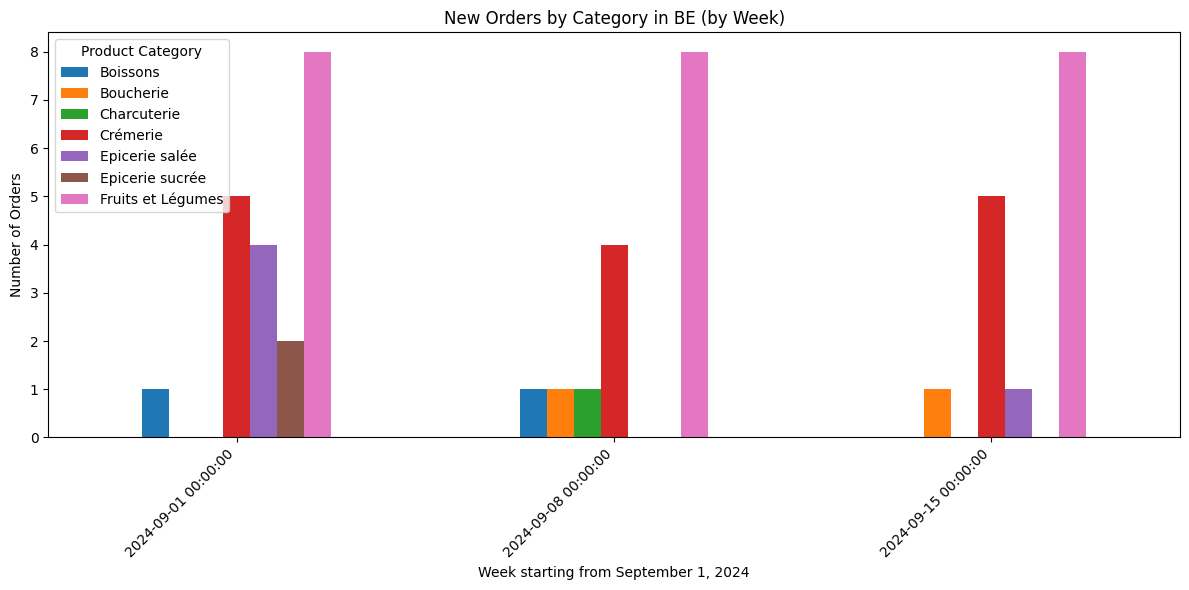

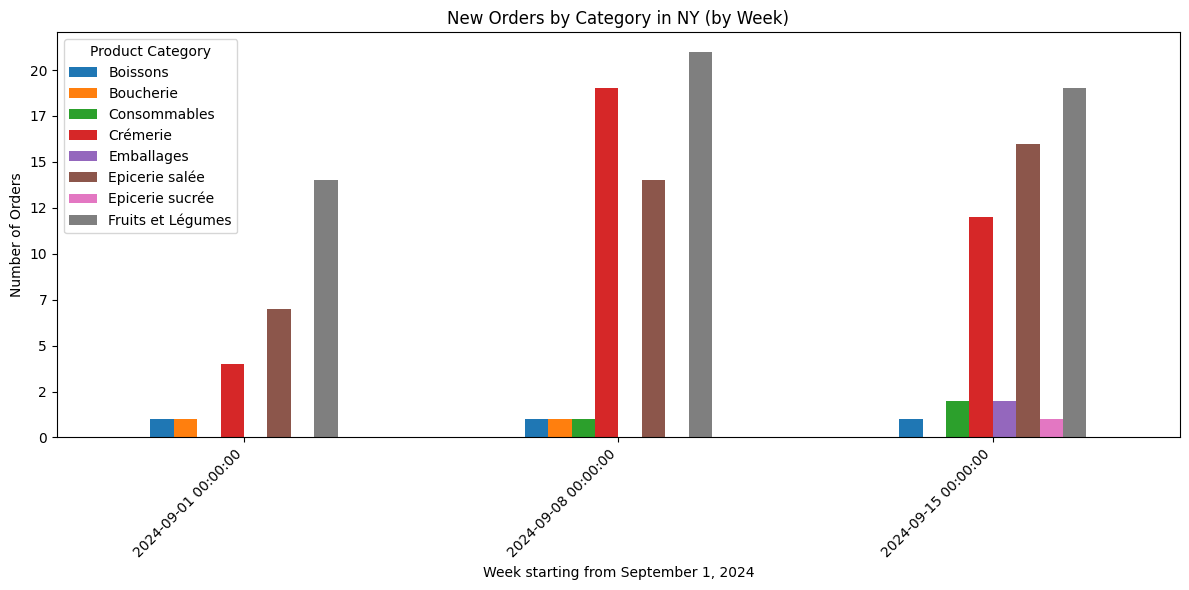

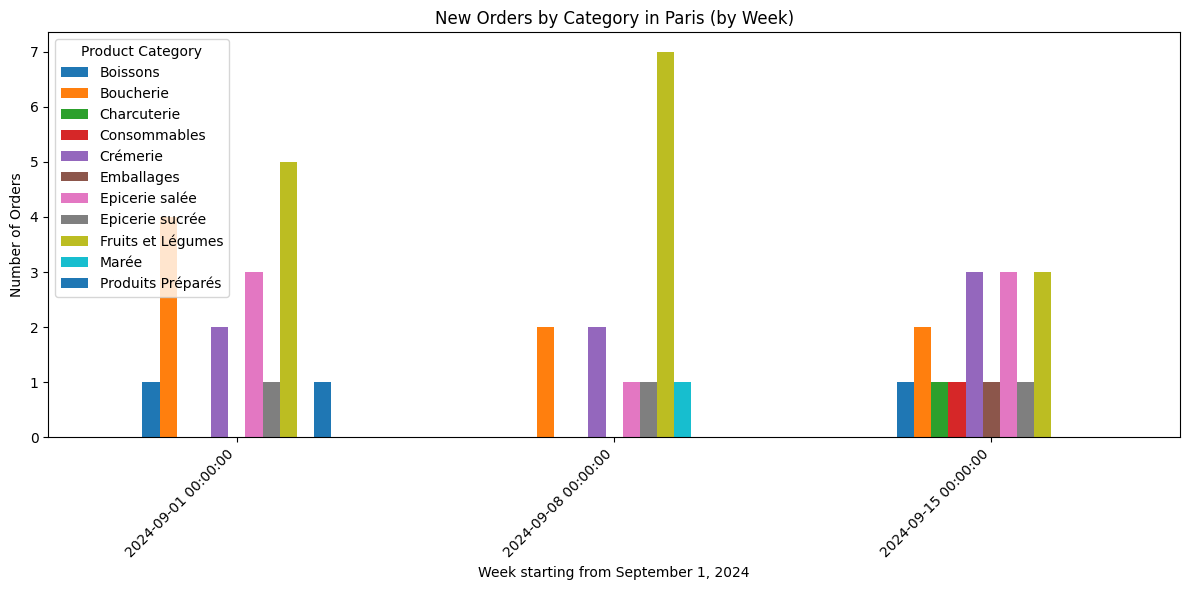

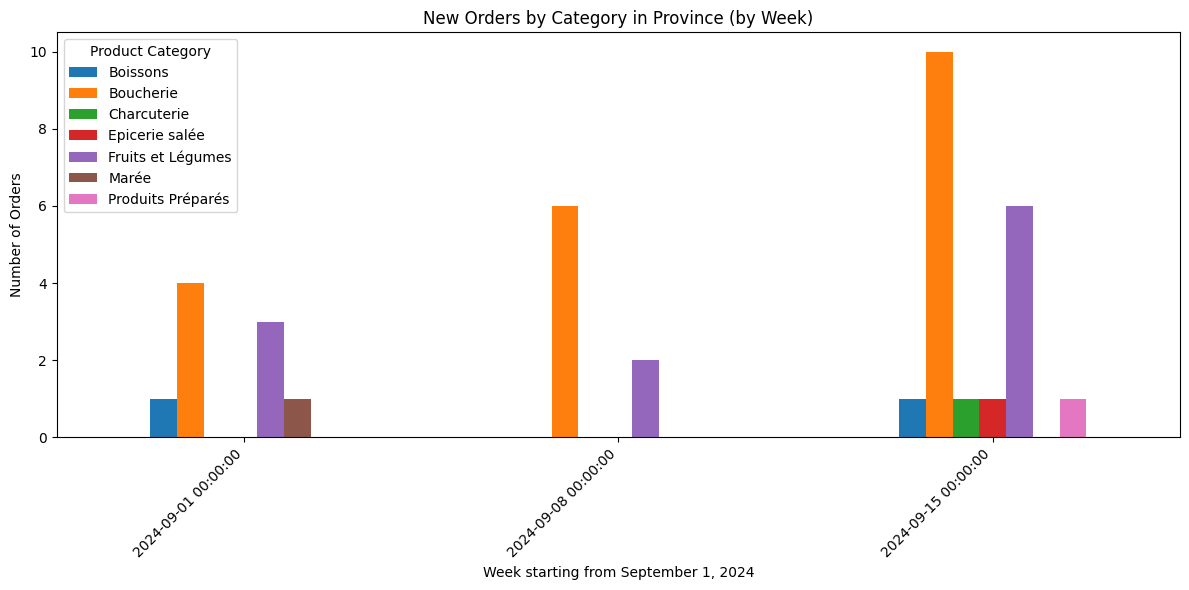

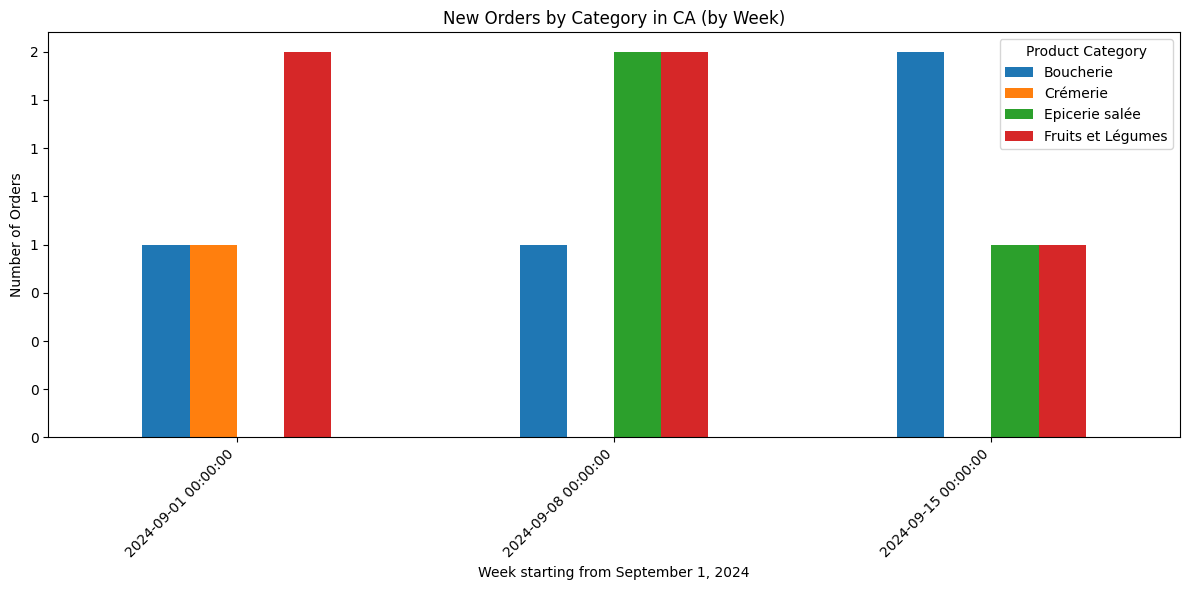

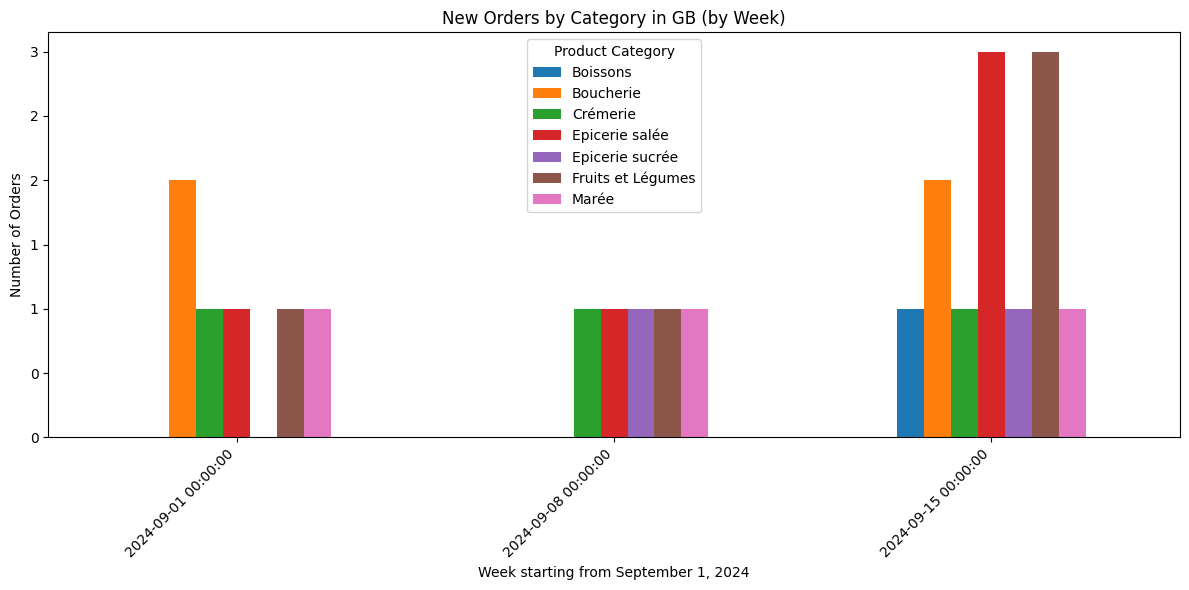

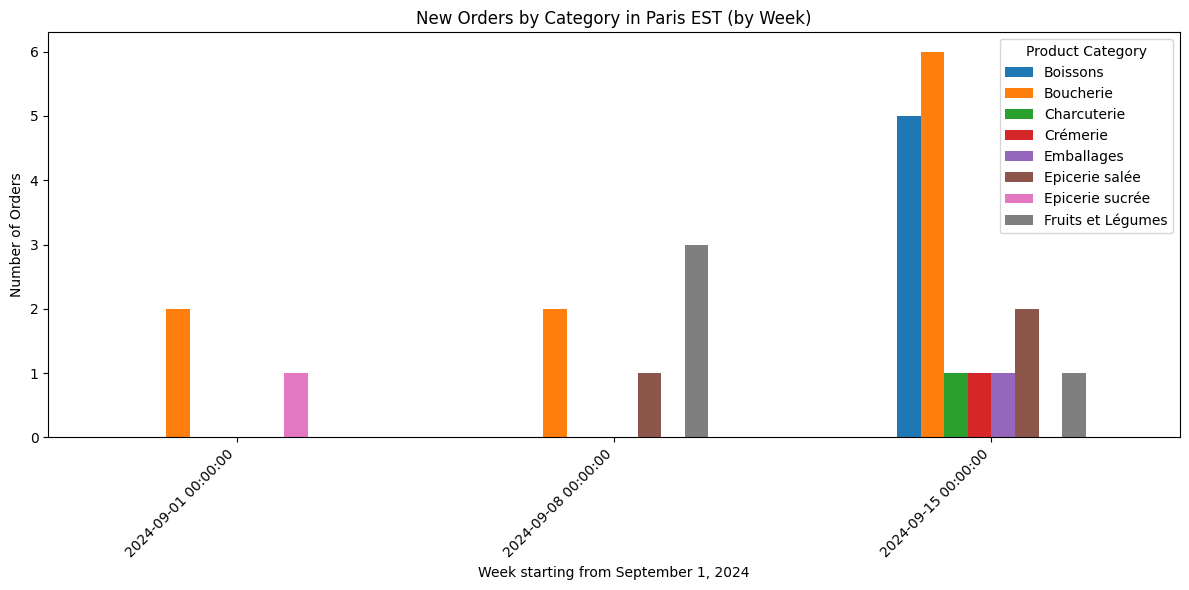

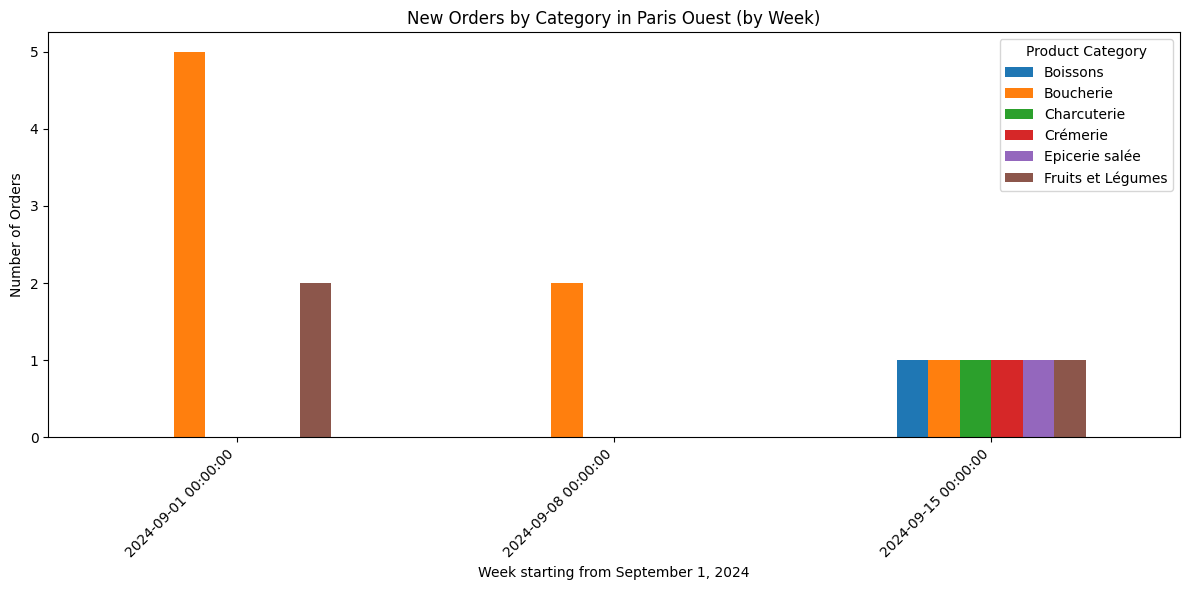

In [24]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month == 9) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load Purchase data from the new Excel file
combined_data = pd.read_excel("/content/drive/MyDrive/Offre d'appel/purchase data.xlsx")

# Check the columns in the combined data
print("Columns in combined_data:", combined_data.columns)

# Filter the purchase data for these references
if 'order_id' in combined_data.columns:
    purchase_data_acquisition = combined_data[combined_data['order_id'].isin(new_customer_references)].copy()

    # Convert 'Date' to datetime and handle any errors
    purchase_data_acquisition['Date'] = pd.to_datetime(purchase_data_acquisition['Date'], errors='coerce')

    # Check the type of the 'Date' column after conversion
    print("Data types in purchase_data_acquisition:\n", purchase_data_acquisition.dtypes)

    # Ensure there are no NaT values before filtering
    purchase_data_acquisition = purchase_data_acquisition.dropna(subset=['Date'])

    # Filter for dates starting from September 2024
    purchase_data_acquisition = purchase_data_acquisition[purchase_data_acquisition['Date'] >= pd.Timestamp('2024-09-01')]

    # Create a week column for grouping (every 7 days since the start of September)
    purchase_data_acquisition['week'] = (purchase_data_acquisition['Date'] - pd.Timestamp('2024-09-01')).dt.days // 7

    # Drop duplicates based on 'order_id' and 'Product Category'
    unique_orders = purchase_data_acquisition.drop_duplicates(subset=['order_id', 'Product Category'])

    # Check if 'region' exists in purchase data
    if 'region' in purchase_data_acquisition.columns:
        # Group by week, product category, and region to count unique clients
        final_grouped_data = unique_orders.groupby(['week', 'Product Category', 'region']).size().reset_index(name='new_clients')

        # Plotting for each region
        regions = final_grouped_data['region'].unique()
        for region in regions:
            region_data = final_grouped_data[final_grouped_data['region'] == region]

            # Pivot the data to have product categories as columns
            pivot_data = region_data.pivot(index='week', columns='Product Category', values='new_clients').fillna(0)

            # Create a date range for the weeks
            start_date = pd.Timestamp('2024-09-01')
            date_range = [start_date + pd.DateOffset(weeks=i) for i in range(pivot_data.shape[0])]

            # Plot as a bar graph
            ax = pivot_data.plot(kind='bar', figsize=(12, 6))

            # Update X-axis with date range
            ax.set_xticklabels(date_range, rotation=45, ha='right')  # Set the labels to the date range

            # Set Y-axis to display whole numbers
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

            plt.title(f'New Orders by Category in {region} (by Week)')
            plt.xlabel('Week starting from September 1, 2024')
            plt.ylabel('Number of Orders')
            plt.tight_layout()
            plt.savefig(f'/content/drive/MyDrive/{region}_orders_by_week.png')
            plt.show()
    else:
        print("The column 'region' is not found in the purchase data.")
else:
    print("The column 'order_id' is not found in the purchase data.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Columns in combined_data: Index(['Date', 'order_id', 'Product Category', 'sub_cat', 'product_name',
       'Supplier', 'region', 'Restaurant_id', 'Restaurant_name', 'GMV',
       'purchase price', 'tax_amount', 'quantity_float', 'Weight',
       'total_weight', 'unit_price'],
      dtype='object')
Data types in purchase_data_acquisition:
 Date                datetime64[ns]
order_id                   float64
Product Category            object
sub_cat                     object
product_name                object
Supplier                    object
region                      object
Restaurant_id              float64
Restaurant_name             object
GMV                        float64
purchase price             float64
tax_amount                 float64
quantity_float             float64
Weight                     float64
total_weight               float64
unit_price                 float64
dtype: object


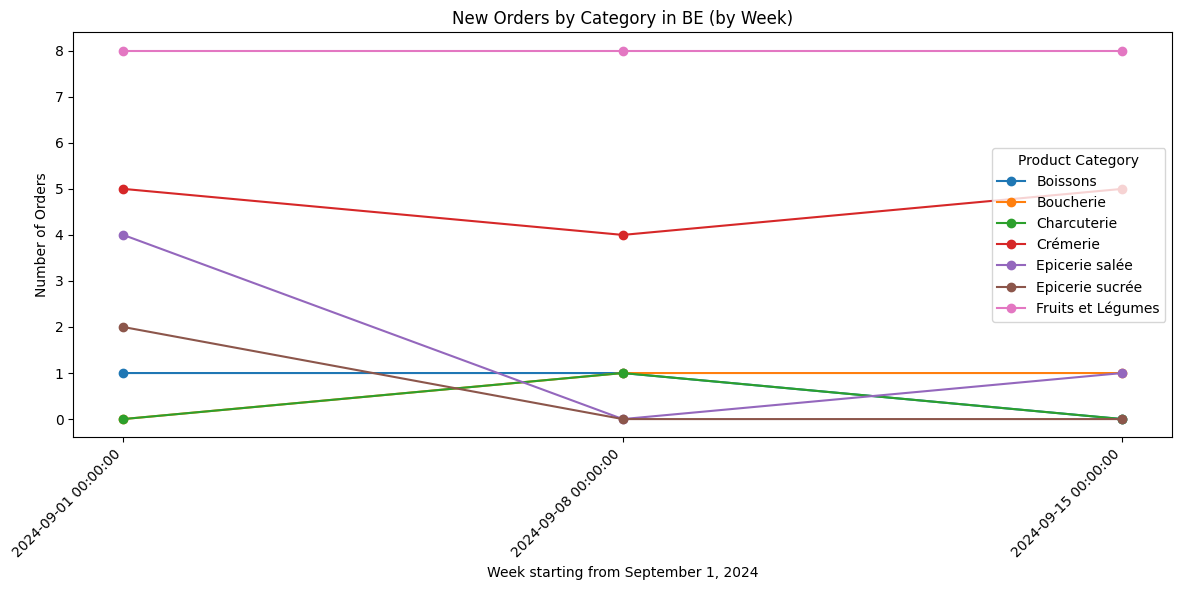

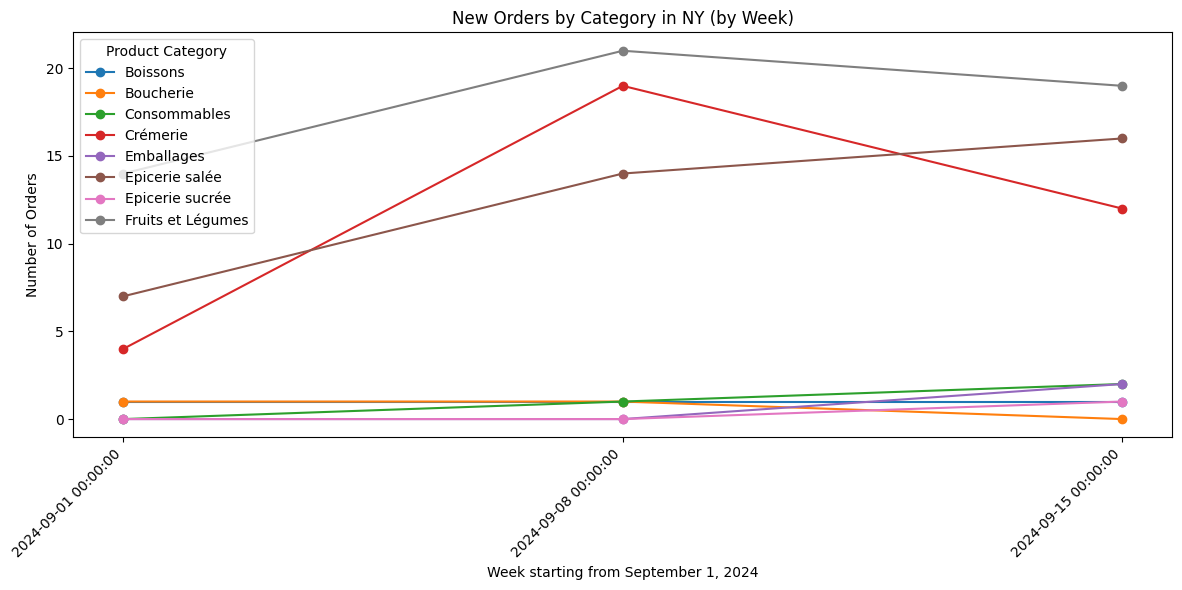

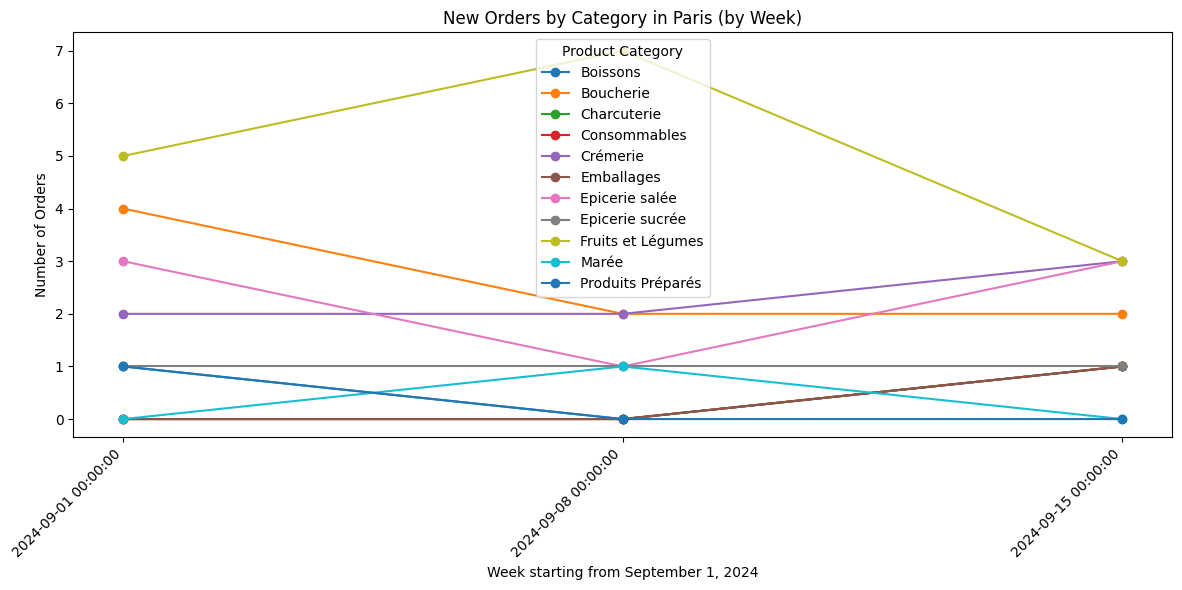

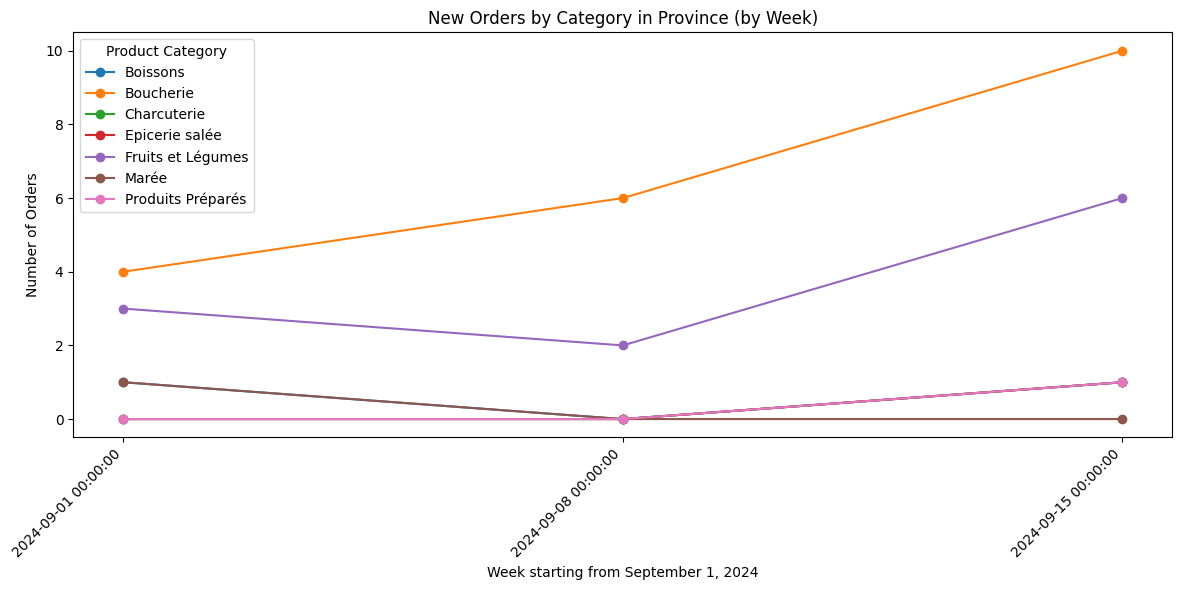

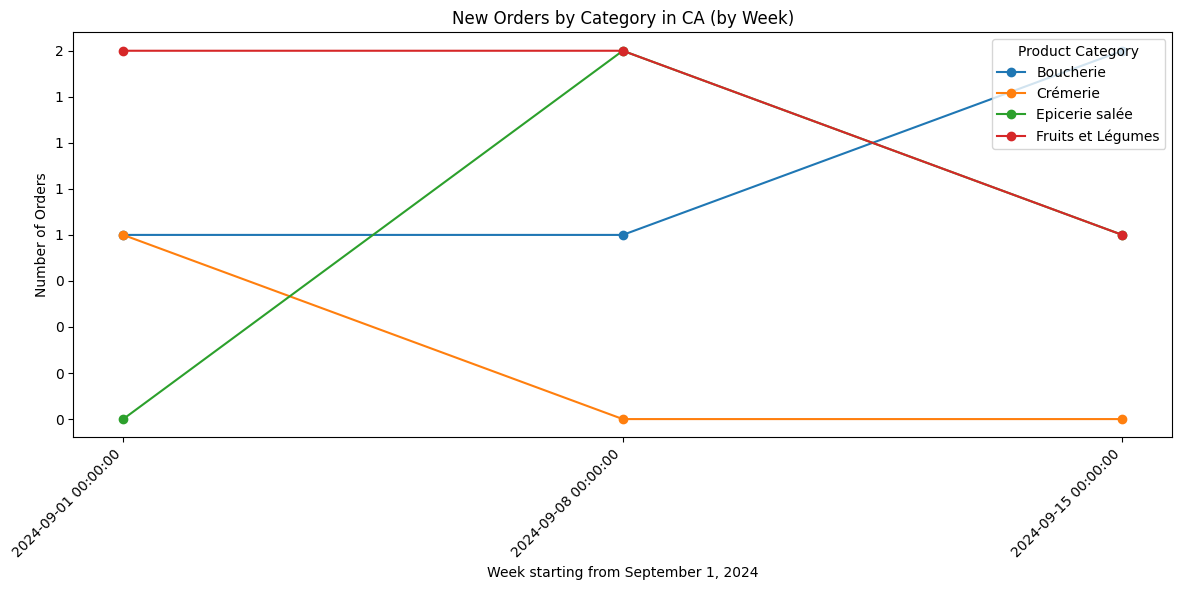

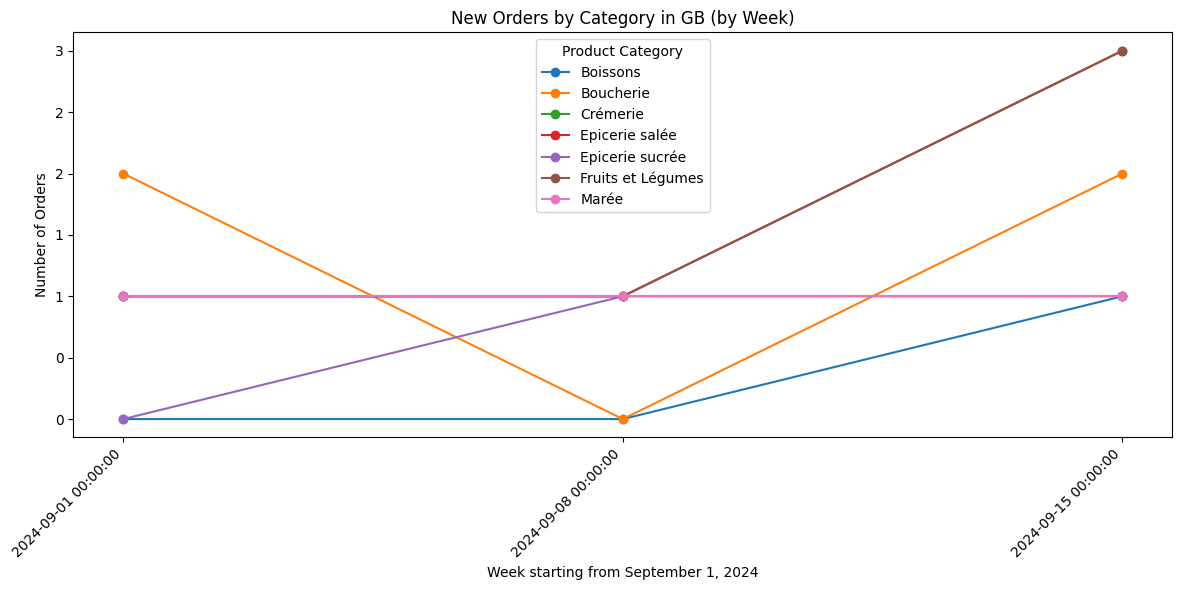

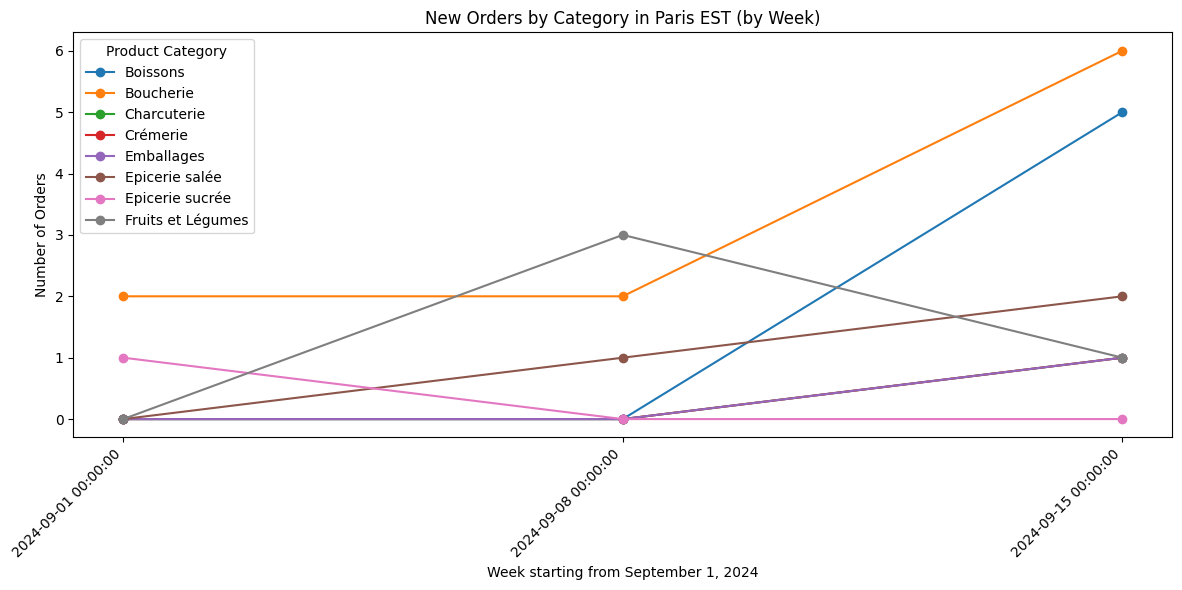

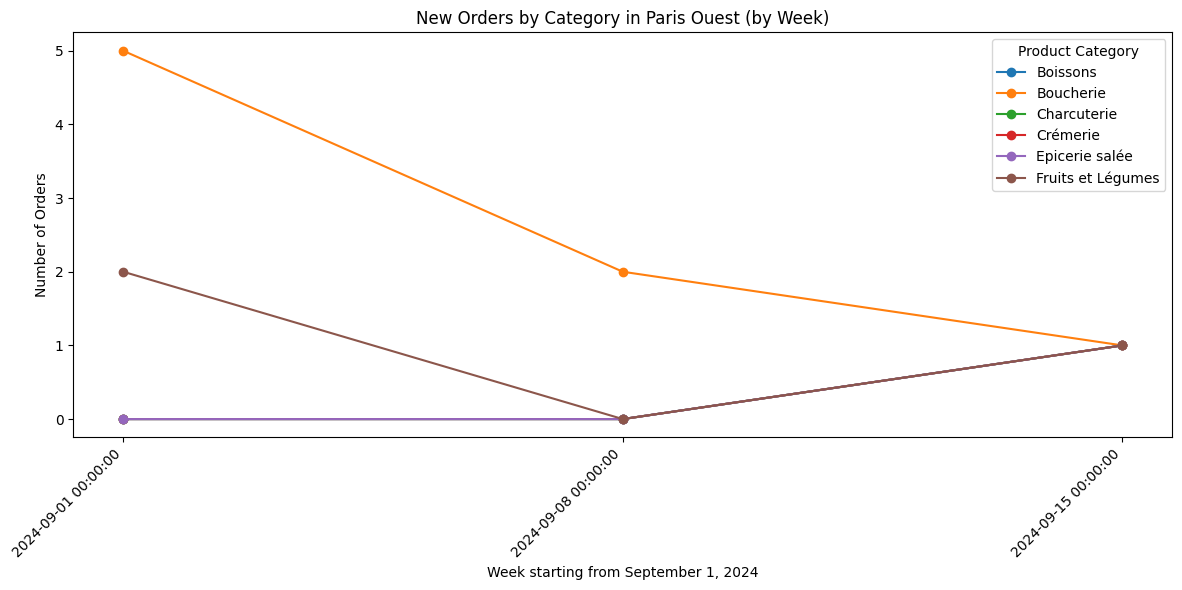

In [25]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month == 9) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load Purchase data from the new Excel file
combined_data = pd.read_excel("/content/drive/MyDrive/Offre d'appel/purchase data.xlsx")

# Check the columns in the combined data
print("Columns in combined_data:", combined_data.columns)

# Filter the purchase data for these references
if 'order_id' in combined_data.columns:
    purchase_data_acquisition = combined_data[combined_data['order_id'].isin(new_customer_references)].copy()

    # Convert 'Date' to datetime and handle any errors
    purchase_data_acquisition['Date'] = pd.to_datetime(purchase_data_acquisition['Date'], errors='coerce')

    # Check the type of the 'Date' column after conversion
    print("Data types in purchase_data_acquisition:\n", purchase_data_acquisition.dtypes)

    # Ensure there are no NaT values before filtering
    purchase_data_acquisition = purchase_data_acquisition.dropna(subset=['Date'])

    # Filter for dates starting from September 2024
    purchase_data_acquisition = purchase_data_acquisition[purchase_data_acquisition['Date'] >= pd.Timestamp('2024-09-01')]

    # Create a week column for grouping (every 7 days since the start of September)
    purchase_data_acquisition['week'] = (purchase_data_acquisition['Date'] - pd.Timestamp('2024-09-01')).dt.days // 7

    # Drop duplicates based on 'order_id' and 'Product Category'
    unique_orders = purchase_data_acquisition.drop_duplicates(subset=['order_id', 'Product Category'])

    # Check if 'region' exists in purchase data
    if 'region' in purchase_data_acquisition.columns:
        # Group by week, product category, and region to count unique clients
        final_grouped_data = unique_orders.groupby(['week', 'Product Category', 'region']).size().reset_index(name='new_clients')

        # Plotting for each region
        regions = final_grouped_data['region'].unique()
        for region in regions:
            region_data = final_grouped_data[final_grouped_data['region'] == region]

            # Pivot the data to have product categories as columns
            pivot_data = region_data.pivot(index='week', columns='Product Category', values='new_clients').fillna(0)

            # Create a date range for the weeks
            start_date = pd.Timestamp('2024-09-01')
            date_range = [start_date + pd.DateOffset(weeks=i) for i in range(pivot_data.shape[0])]

            # Plot as a line graph
            ax = pivot_data.plot(kind='line', figsize=(12, 6), marker='o')

            # Update X-axis with date range
            ax.set_xticks(range(len(date_range)))
            ax.set_xticklabels(date_range, rotation=45, ha='right')  # Set the labels to the date range

            # Set Y-axis to display whole numbers
            ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))

            plt.title(f'New Orders by Category in {region} (by Week)')
            plt.xlabel('Week starting from September 1, 2024')
            plt.ylabel('Number of Orders')
            plt.tight_layout()
            plt.savefig(f'/content/drive/MyDrive/{region}_orders_by_week_line.png')
            plt.show()
    else:
        print("The column 'region' is not found in the purchase data.")
else:
    print("The column 'order_id' is not found in the purchase data.")


# Presence des cat/BU - Septembre

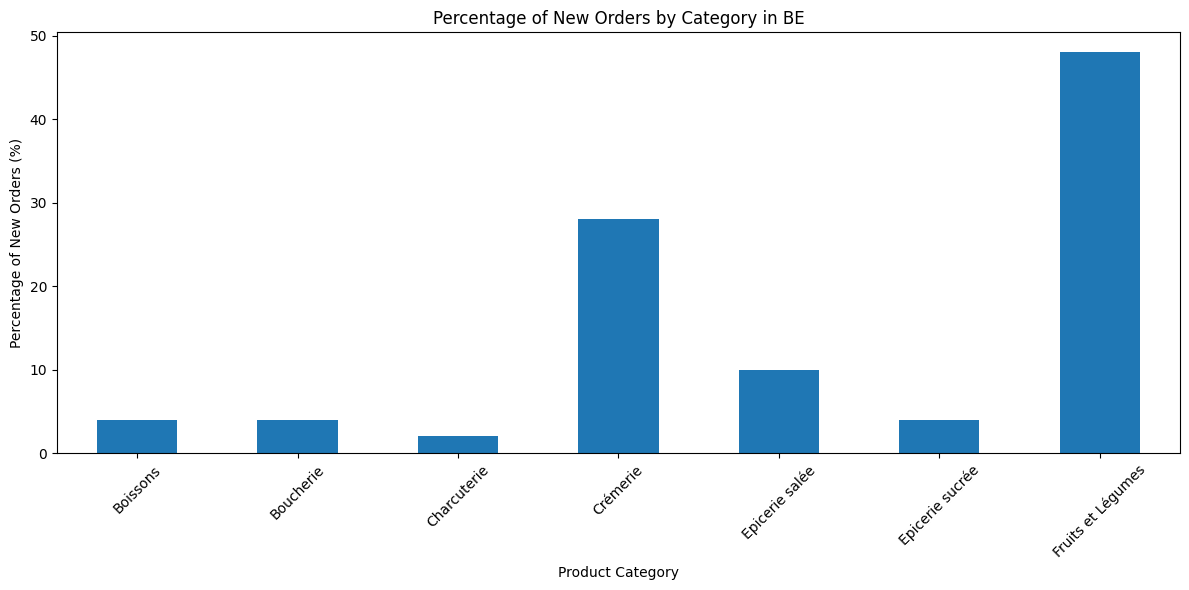

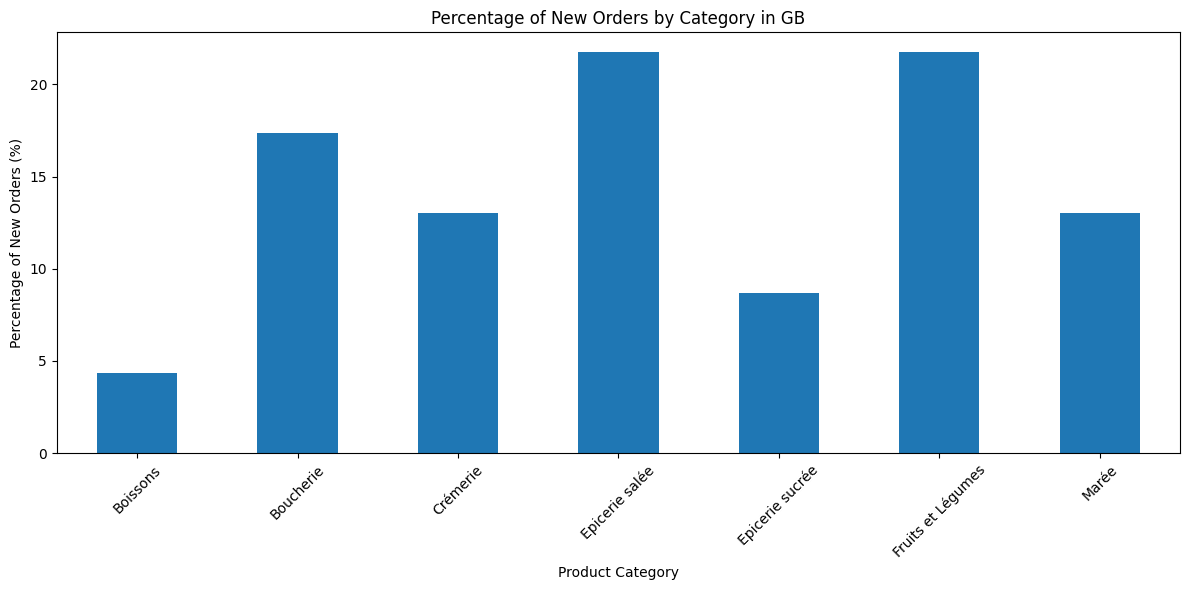

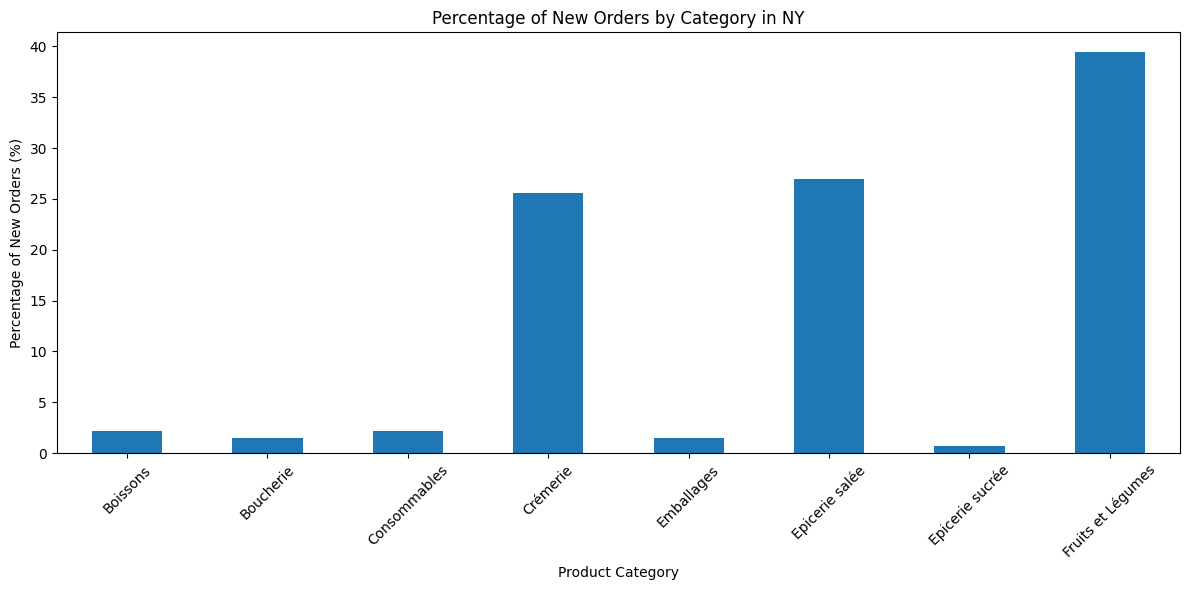

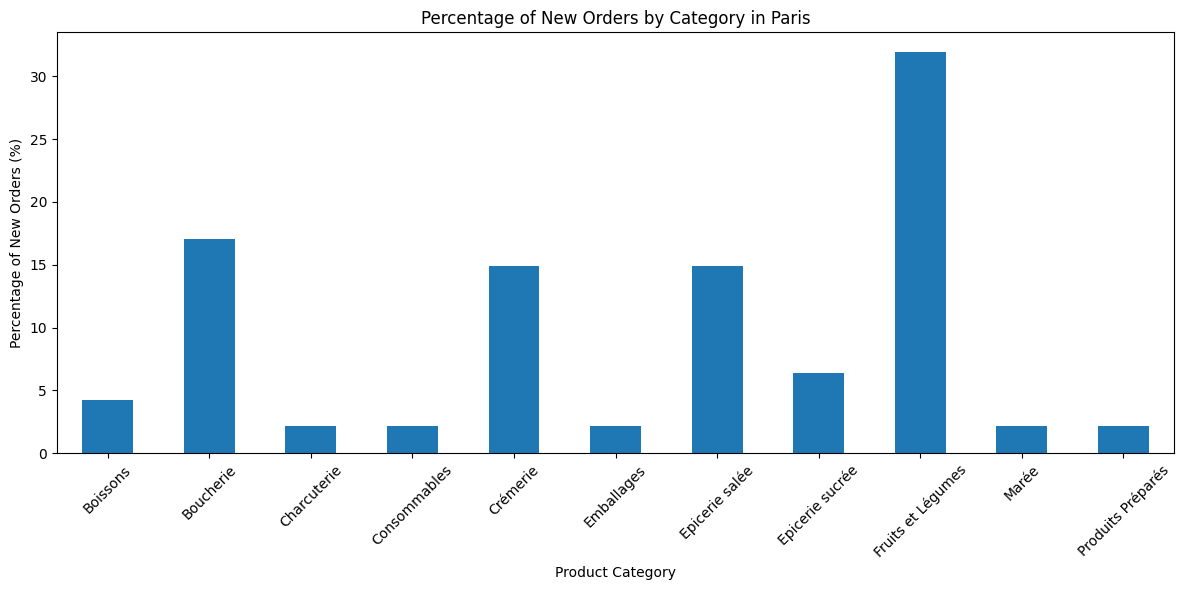

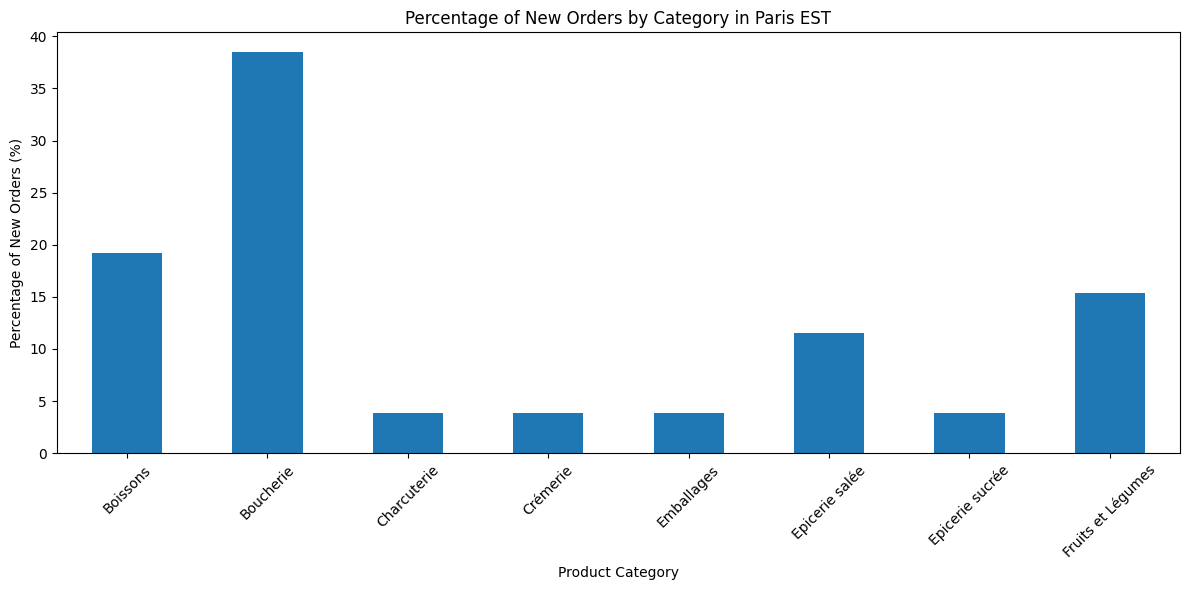

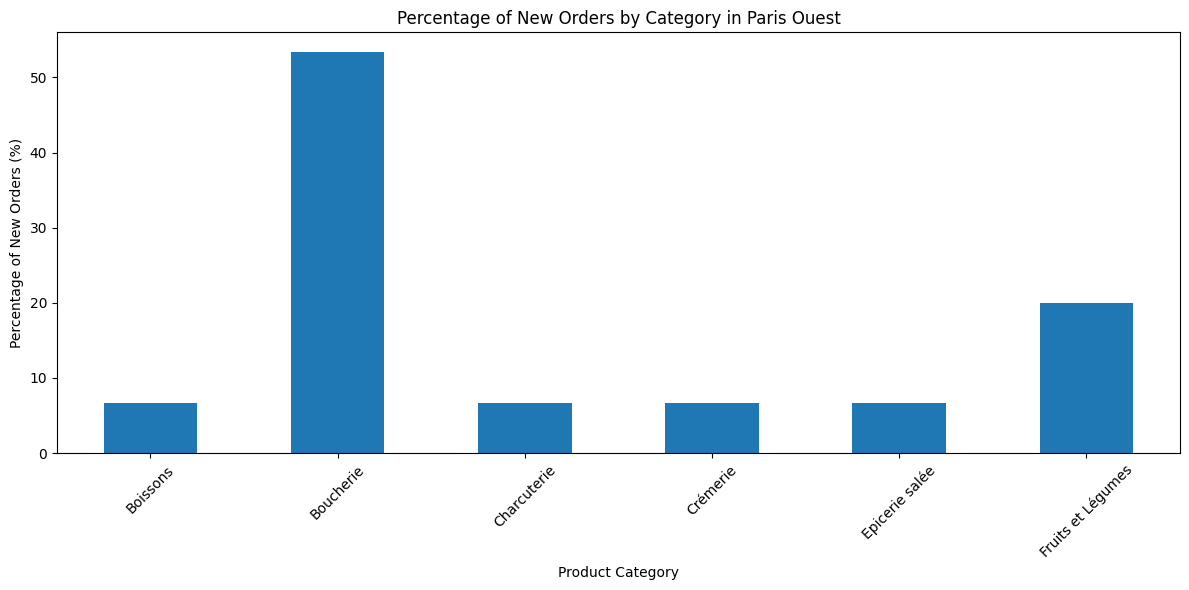

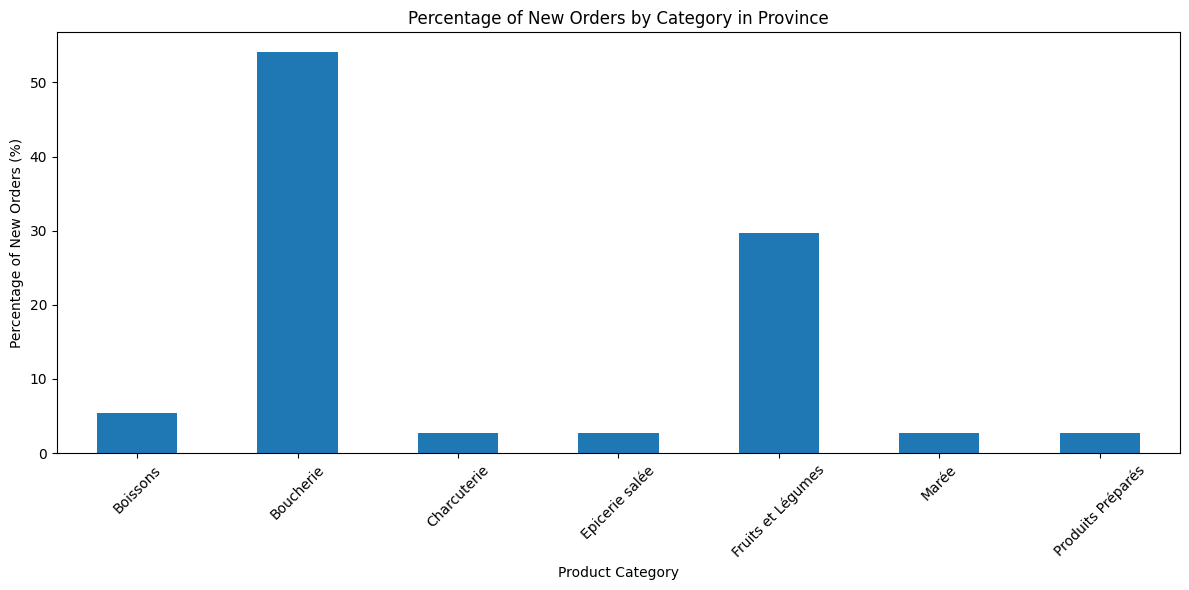

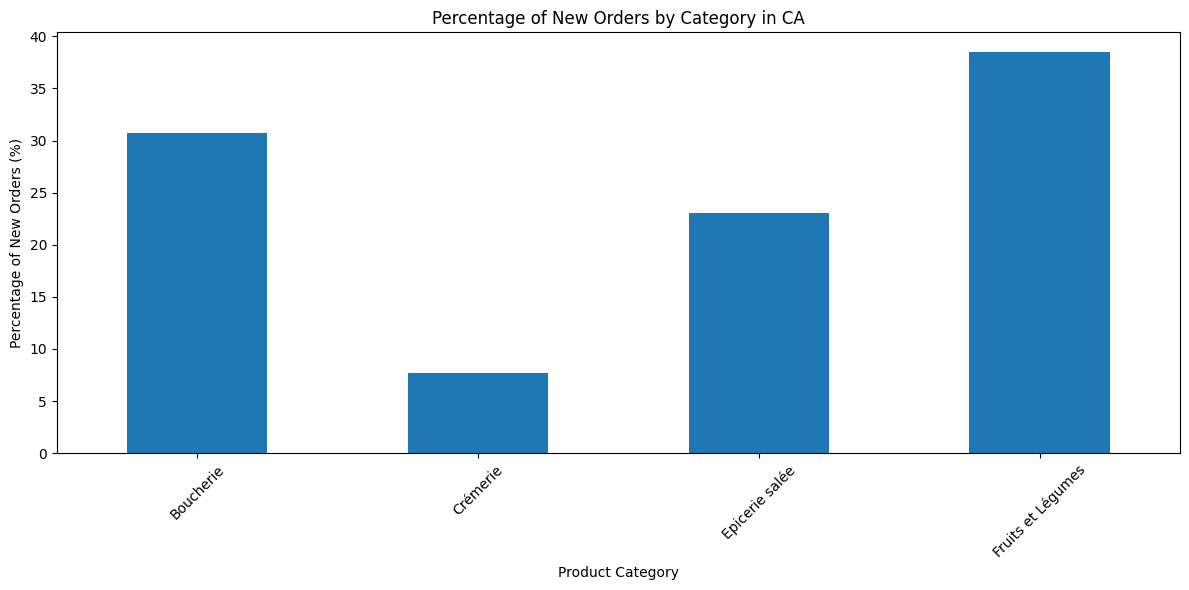

In [26]:
# Group by product category and region to count unique clients
final_grouped_data = unique_orders.groupby(['Product Category', 'region']).size().reset_index(name='new_clients')

# Calculate total new clients per region
total_new_clients = final_grouped_data.groupby('region')['new_clients'].sum().reset_index(name='total_clients')

# Merge total clients back to final grouped data to calculate percentage
final_grouped_data = final_grouped_data.merge(total_new_clients, on='region')

# Calculate percentage of new clients
final_grouped_data['percentage'] = (final_grouped_data['new_clients'] / final_grouped_data['total_clients']) * 100

# Plotting for each region
regions = final_grouped_data['region'].unique()
for region in regions:
    region_data = final_grouped_data[final_grouped_data['region'] == region]

    # Plot as a bar graph with percentage
    region_data.plot(x='Product Category', y='percentage', kind='bar', figsize=(12, 6), legend=False)
    plt.title(f'Percentage of New Orders by Category in {region}')
    plt.xlabel('Product Category')
    plt.ylabel('Percentage of New Orders (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f'/content/drive/MyDrive/{region}_orders_by_category_percentage.png')
    plt.show()


#Q3 Evolution des catégories en acquisition

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Columns in combined_data: Index(['Date', 'order_id', 'Product Category', 'sub_cat', 'product_name',
       'Supplier', 'region', 'Restaurant_id', 'Restaurant_name', 'GMV',
       'purchase price', 'tax_amount', 'quantity_float', 'Weight',
       'total_weight', 'unit_price'],
      dtype='object')


<ipython-input-43-f9e01af826c7>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_data_acquisition['Date'] = pd.to_datetime(purchase_data_acquisition['Date'])
<ipython-input-43-f9e01af826c7>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_orders['week'] = unique_orders['Date'].dt.to_period('W').apply(lambda r: r.start_time)


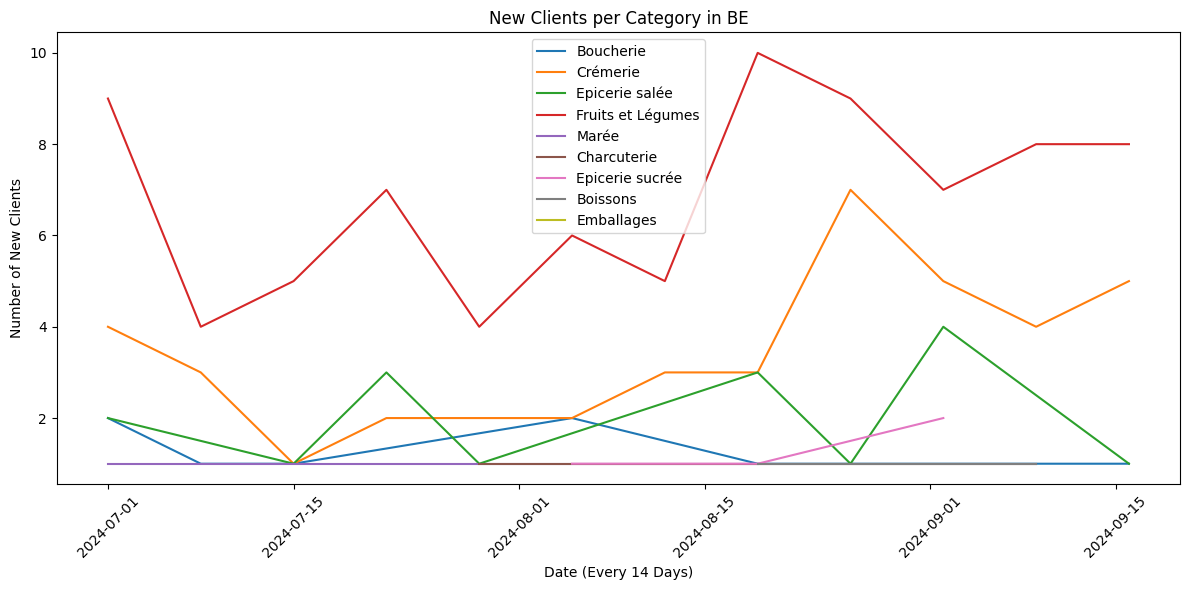

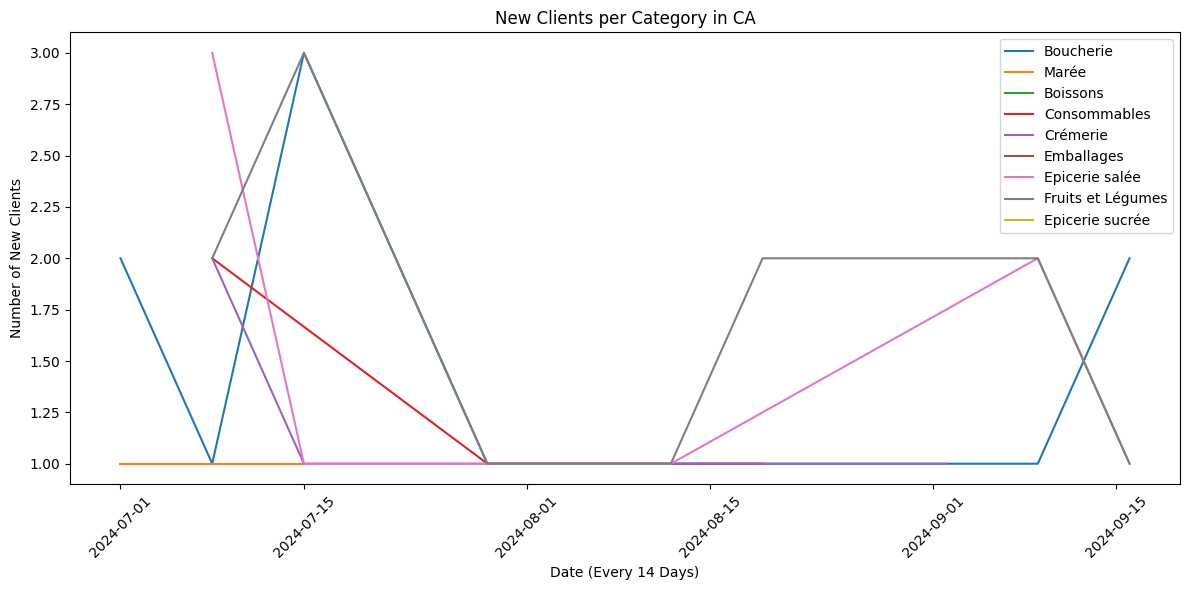

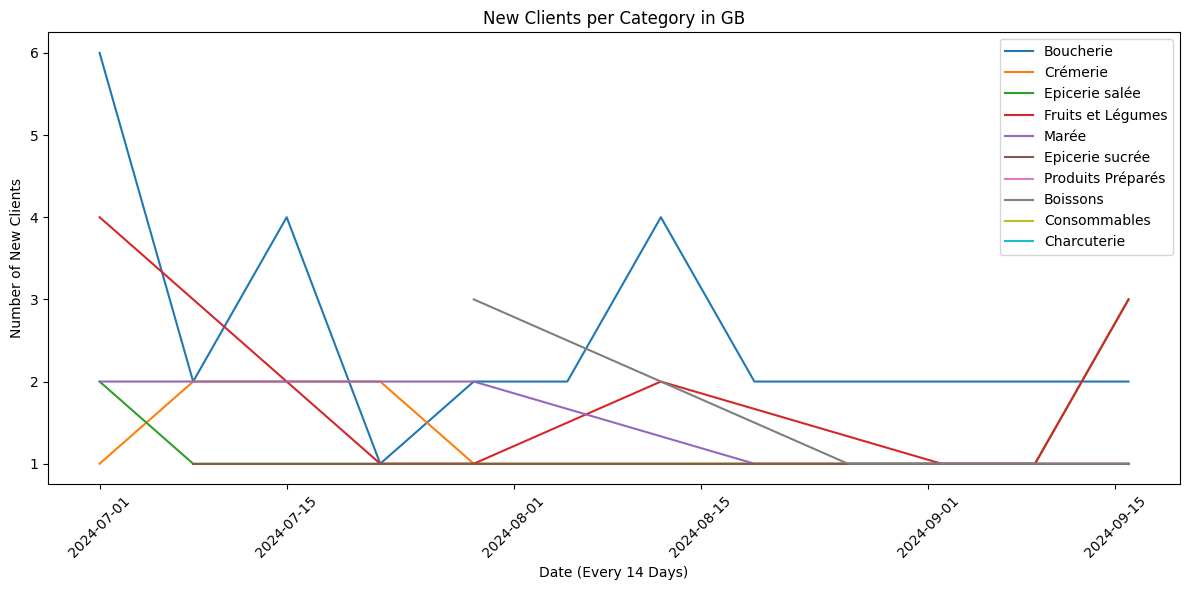

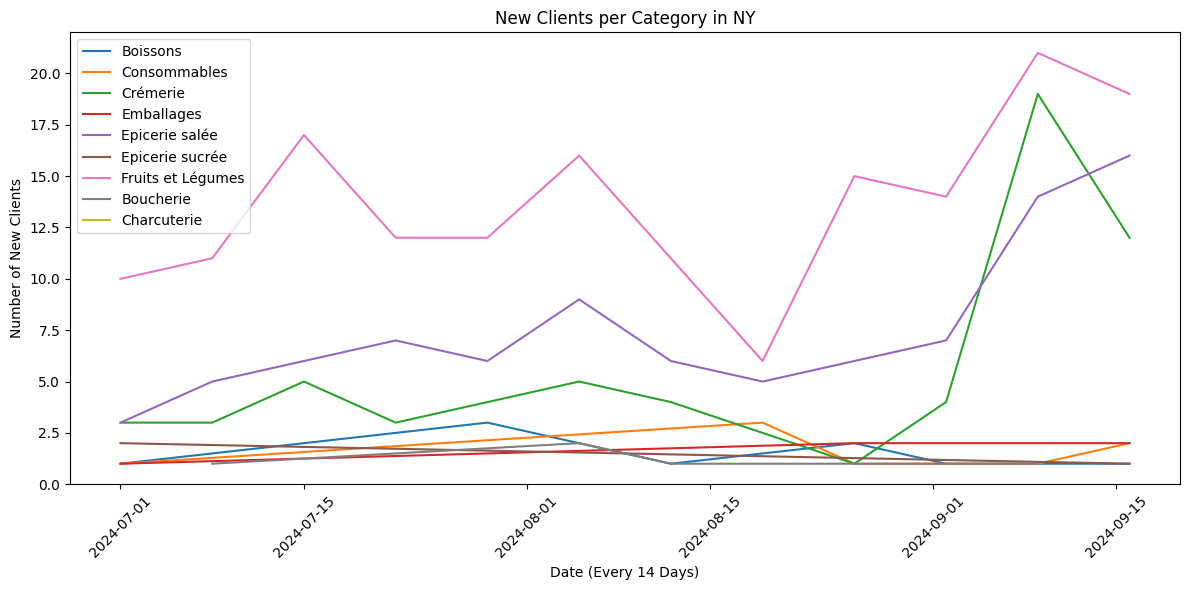

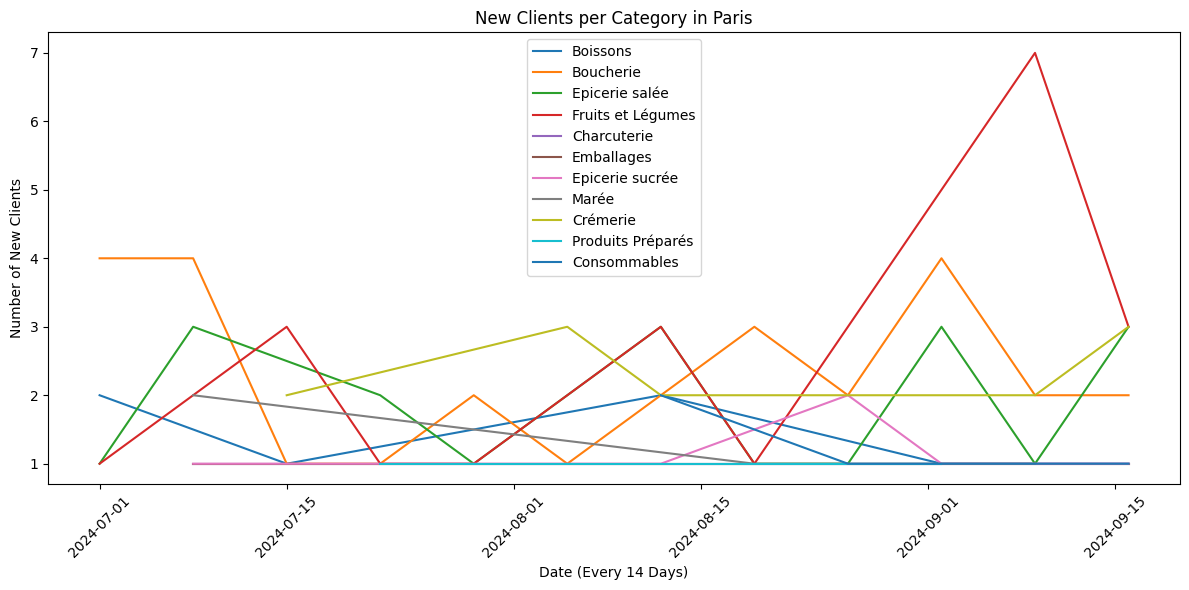

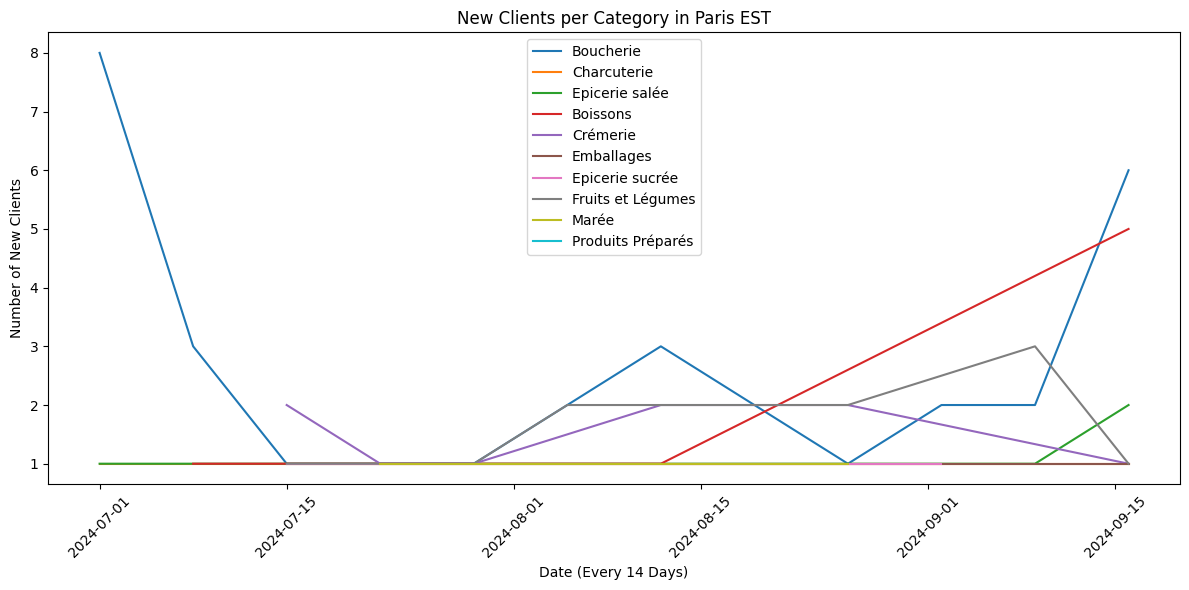

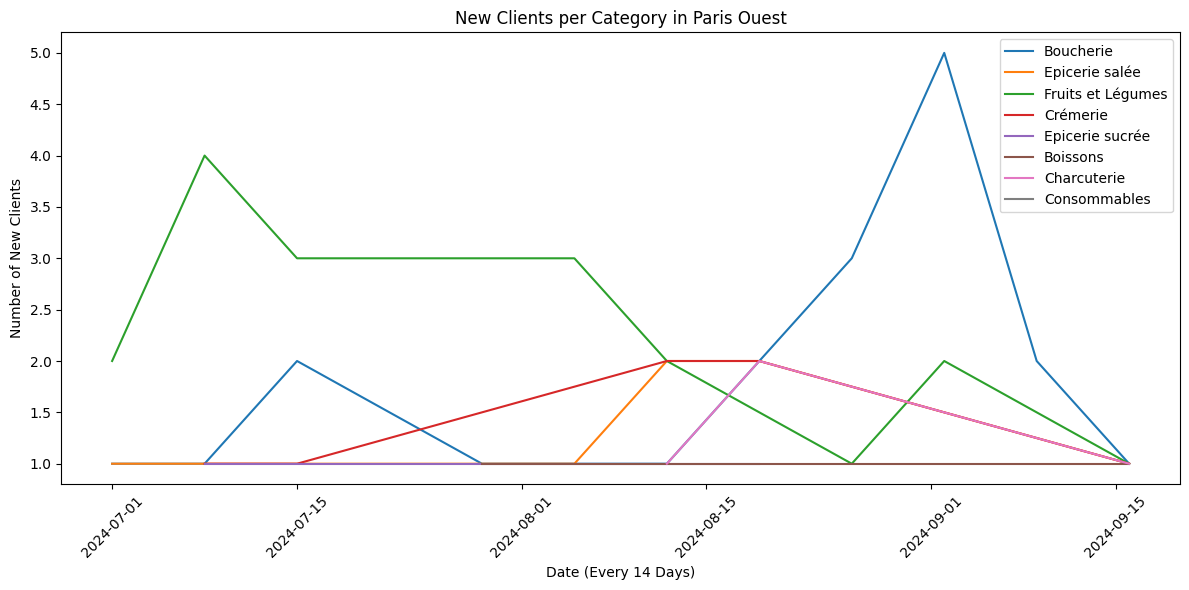

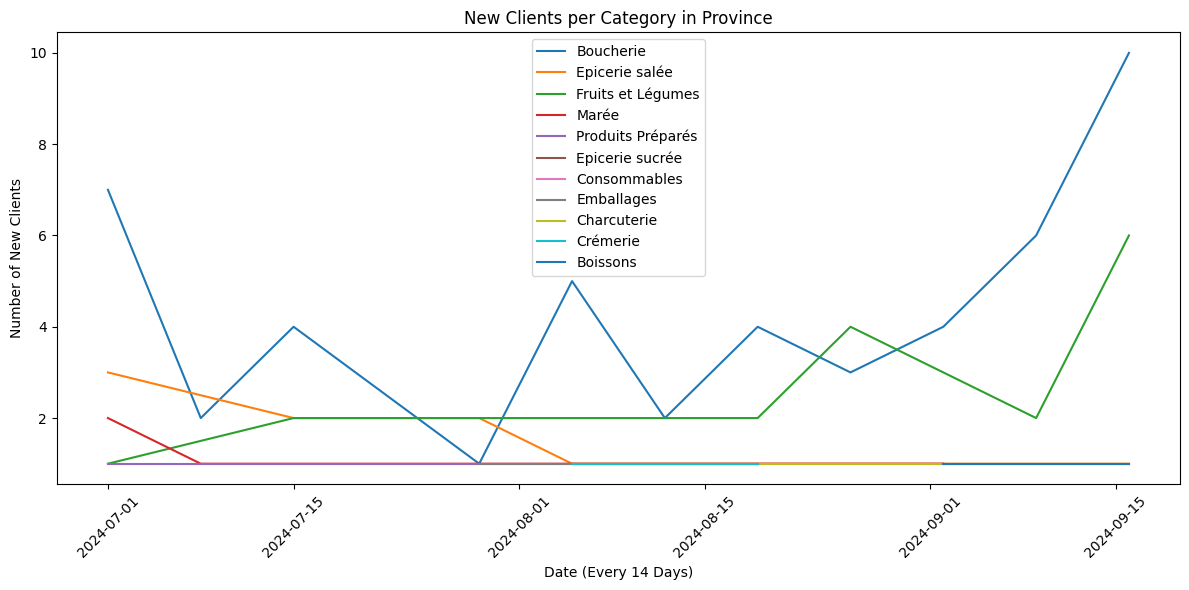

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Acquisition
import pandas as pd
import matplotlib.pyplot as plt

# Load Acquisition CSV data
df = pd.read_csv(
    '/content/drive/Shareddrives/Commandes BO/prepared_data.csv',
    parse_dates=['date 1ere commande (Restaurant)', 'Date de commande'],
    decimal='.',  # Corrected decimal parameter
    low_memory=False
)

# Data cleaning
to_exclude_commande = ['CANCELLED', 'ABANDONED', 'FAILED', 'WAITING']
to_exclude_paiement = ['CANCELLED', 'ERROR']
df = df[~df['Statut commande'].isin(to_exclude_commande)]
df = df[~df['Statut paiement'].isin(to_exclude_paiement)]
df = df[~df['Canal'].str.contains('trading', case=False, na=False)]

# Ensure the date columns are in datetime format
df['date 1ere commande (Restaurant)'] = pd.to_datetime(df['date 1ere commande (Restaurant)'])
df['Date de commande'] = pd.to_datetime(df['Date de commande'])

# Filter for new customers with their first order in July, August, or September 2024
new_customers_july_august_september_2024 = df[
    (df['date 1ere commande (Restaurant)'].dt.year == 2024) &
    (df['date 1ere commande (Restaurant)'].dt.month.isin([7, 8, 9])) &
    (df['date 1ere commande (Restaurant)'] == df['Date de commande'])
]

# Extract the order references into a list
new_customer_references = new_customers_july_august_september_2024['Reference'].dropna().astype(int).tolist()

# Load Purchase data from the new Excel file
combined_data = pd.read_excel("/content/drive/MyDrive/Offre d'appel/purchase data.xlsx")

# Check the columns in the combined data
print("Columns in combined_data:", combined_data.columns)

# Filter the purchase data for these references
if 'order_id' in combined_data.columns:
    purchase_data_acquisition = combined_data[combined_data['order_id'].isin(new_customer_references)]

    # Convert 'Date' to datetime
    purchase_data_acquisition['Date'] = pd.to_datetime(purchase_data_acquisition['Date'])

    # Filter for dates starting from July
    purchase_data_acquisition = purchase_data_acquisition[purchase_data_acquisition['Date'] >= '2023-07-01']

    # Drop duplicates to ensure each order_id is counted once per category
    unique_orders = purchase_data_acquisition.drop_duplicates(subset=['order_id', 'Product Category'])

    # Create a week column for grouping
    unique_orders['week'] = unique_orders['Date'].dt.to_period('W').apply(lambda r: r.start_time)

    # Group by week, region, and category to count new clients
    grouped_data = unique_orders.groupby(['week', 'region', 'Product Category']).size().reset_index(name='new_clients')

    # Create line graphs for each region
    regions = grouped_data['region'].unique()

    for region in regions:
        plt.figure(figsize=(12, 6))
        region_data = grouped_data[grouped_data['region'] == region]

        for category in region_data['Product Category'].unique():
            category_data = region_data[region_data['Product Category'] == category]
            plt.plot(category_data['week'], category_data['new_clients'], label=category)

        plt.title(f'New Clients per Category in {region}')
        plt.xlabel('Date (Every 14 Days)')
        plt.ylabel('Number of New Clients')
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.savefig(f'/content/drive/MyDrive/{region}_new_clients.png')
        plt.show()
else:
    print("The column 'order_id' is not found in the purchase data.")


# Streamlit

In [29]:
# Install Streamlit and Localtunnel
!pip install streamlit
!npm install -g localtunnel
# Create the Streamlit app file
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Streamlit app
st.title("My Streamlit App")
st.write("This is a simple interactive graph.")

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)
st.pyplot(fig)
""")
# Run the Streamlit app and expose it using Localtunnel
!streamlit run app.py & npx localtunnel --port 8501



added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

1 moderate severity vulnerability

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.27.162:8501

your url is: https://great-stars-work.loca.lt
  Stopping...
^C


# Nouvelle section

In [31]:
# Create the Streamlit app file
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import matplotlib.pyplot as plt
import numpy as np

# Create some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Streamlit app
st.title("My Streamlit App")
st.write("This is a simple interactive graph.")

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y)
st.pyplot(fig)
""")
# Create the requirements file
with open('requirements.txt', 'w') as f:
    f.write("""
streamlit
matplotlib
numpy
""")
from google.colab import files
files.download('app.py')
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>